### Case Study Selection : Overall Analysis on Desktops

The objective of this project is to perform the complete analysis on Desktop's features, price range, brand preferences by customers. Through this project the aim is to gain insights on every important aspects of Desktop industry.

### Relevant Website : Flipkart

### Problem Statement :

**A newly formed ABC Desktop brand wants to launch their desktops on Flipkart, but before launching they want the complete market understanding of how other brands are performing and based upon that they will make changes with their desktop features and marketing strategies !!**

### Data Extraction :

In [8]:
import requests
from bs4 import BeautifulSoup

In [9]:
url = 'https://www.flipkart.com/search?q=desktop&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY'
url

'https://www.flipkart.com/search?q=desktop&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY'

In [10]:
page= requests.get(url)
page

<Response [200]>

In [11]:
soup= BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [13]:
import re
import numpy as np

In [14]:
brands = []
model=[]
RAM=[]
storage=[]
inch=[]
price=[]
discounts=[]
ratings=[]
Color=[]


for i in range(1,16):
    url = f'https://www.flipkart.com/search?q=desktop&otracker=AS_Query_HistoryAutoSuggest_2_0&otracker1=AS_Query_HistoryAutoSuggest_2_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=2&as-type=HISTORY&page={i}'
#     print(url)
    
    page=requests.get(url)
    soup=BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all('div', class_='_4ddWXP'):
        
        
        ##brands
        brand= i.find('a', class_='s1Q9rs')
        b=brand.text
        regex=re.findall('^[\w&]+',b)
        if regex:
            brands.append(regex[0])
        else:
            brands.append(np.nan)
            
        ##model
        mod = i.find('a', class_='s1Q9rs')
        m = mod.text
        regex=re.findall('\w+\s(.+)\s(?:\(|\"|All in One Desktop|Desktop|Touch Panel)', m)
        if regex:
            model.append(regex[0])
        else:
            model.append(np.nan)
            
        
        ##Color
        col=i.find('div', class_='_3Djpdu')
        clr=col.text
        regex=re.findall(r'\b(?:White|Black|Starry\sWhite|Multicolor|Blue|Red|Silver|Snow\sWhite|Pink|RGB|Jet\sBlack|Green|Snow\swhite|RED|GREEN|BLACK|Starry\swhite|MULTYCOLOR|black|Jet\sblack)\b',clr)
        if regex:
            Color.append(regex[0])
        else:
            Color.append(np.nan)
            
            
        ##RAM
        rm = i.find('a', class_='s1Q9rs')['title']
        regex=re.findall(r'\b(\d{1,2})\s*GB\b',rm)
        if regex:
            RAM.append(regex[0])
        else:
            RAM.append(np.nan)       
        
        ##Storage
        strg = i.find('a', class_='s1Q9rs')['title']
        regex=re.findall(r'(?:\d{1,4})\sGB\s\SSD|(?:\d{3,4})\sGB|(?:\d{1,2})\sTB',strg)
        if regex:
            storage.append(regex[0])
        else:
            storage.append(np.nan)
       
        
        ##inches
        inches=i.find('a', class_='s1Q9rs')['title']
        regex=re.findall('\d+\.\d+\sInch|\d+\sInch',inches)
        if regex:
            inch.append(regex[0])
        else:
            inch.append(np.nan)

            
        ##prices
        prices=i.find('a', class_='_8VNy32')
        p=prices.text
        regex=re.findall('^₹([\d,]+)',p)
        if regex:
            price.append(regex[0])
        else:
            price.append(np.nan)
            
            
        ##Discounts
        dis=i.find('a', class_='_8VNy32')
        d=dis.text
        regex=re.findall('(\d{1,2})\%',d)
        if regex:
            discounts.append(regex[0])
        else:
            discounts.append(np.nan)
        
        
        ##Ratings
        rating=i.find('span', class_='_1lRcqv')
        if rating:
            ratings.append(rating.text)
        else:
            ratings.append(np.nan)
        

### Creating DataFrame :

In [16]:
import pandas as pd
data=pd.DataFrame({'Brand':brands,'Model':model,'Color':Color,'RAM':RAM,'Storage':storage,'Inch':inch,'Price':price,'Discounts':discounts,'Ratings':ratings})
data

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts,Ratings
0,ENTWINO,Gaming i7 860,NaN,16,1 TB,NaN,"16,699",66,3.6
1,ASUS,AiO A3 Series,White,8,512 GB SSD,23.8 Inch,"63,990",23,4.8
2,DZAB,Intel Core i5,Black,8,500 GB,19 Inch,"11,995",70,4
3,ASUS,"Vivo AiO V222, All in One",White,8,256 GB SSD,21.5 Inch,"30,990",32,4.5
4,DZAB,Assemble Core i3,Black,4,500 GB,15.1 Inch,"7,994",66,3.6
...,...,...,...,...,...,...,...,...,...
595,ZOONIS,BUDGET Core 2 Duo,Black,4,500 GB,15 Inch,"10,999",50,2.3
596,ZOONIS,G SERIES Core 2 Duo,Black,4,500 GB,18.5 Inch,"14,399",52,2
597,HP,?HP AIO PC Core i7,Black,16,1 TB,27 Inch,"1,37,999",11,NaN
598,ZOONIS,Gameing Core i7,Black,8,500 GB,19 Inch,"21,999",56,3.3


### Exporting into .csv format :

In [17]:
data.to_csv(r'C:\Users\isham\OneDrive\Desktop\Desktop_Data.csv', index=False)

### Reading csv file :

In [19]:
import pandas as pd
df=pd.read_csv(r"C:\Users\isham\OneDrive\Desktop\Desktop_Data.csv")
df

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts,Ratings
0,ENTWINO,Gaming i7 860,NaN,16.0,1 TB,NaN,"16,699",66.0,3.6
1,ASUS,AiO A3 Series,White,8.0,512 GB SSD,23.8 Inch,"63,990",23.0,4.8
2,DZAB,Intel Core i5,Black,8.0,500 GB,19 Inch,"11,995",70.0,4.0
3,ASUS,"Vivo AiO V222, All in One",White,8.0,256 GB SSD,21.5 Inch,"30,990",32.0,4.5
4,DZAB,Assemble Core i3,Black,4.0,500 GB,15.1 Inch,"7,994",66.0,3.6
...,...,...,...,...,...,...,...,...,...
595,ZOONIS,BUDGET Core 2 Duo,Black,4.0,500 GB,15 Inch,"10,999",50.0,2.3
596,ZOONIS,G SERIES Core 2 Duo,Black,4.0,500 GB,18.5 Inch,"14,399",52.0,2.0
597,HP,?HP AIO PC Core i7,Black,16.0,1 TB,27 Inch,"1,37,999",11.0,NaN
598,ZOONIS,Gameing Core i7,Black,8.0,500 GB,19 Inch,"21,999",56.0,3.3


In [22]:
#Before proceeding lets make a copy of original data

df1=df.copy()
df1

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts,Ratings
0,ENTWINO,Gaming i7 860,NaN,16.0,1 TB,NaN,"16,699",66.0,3.6
1,ASUS,AiO A3 Series,White,8.0,512 GB SSD,23.8 Inch,"63,990",23.0,4.8
2,DZAB,Intel Core i5,Black,8.0,500 GB,19 Inch,"11,995",70.0,4.0
3,ASUS,"Vivo AiO V222, All in One",White,8.0,256 GB SSD,21.5 Inch,"30,990",32.0,4.5
4,DZAB,Assemble Core i3,Black,4.0,500 GB,15.1 Inch,"7,994",66.0,3.6
...,...,...,...,...,...,...,...,...,...
595,ZOONIS,BUDGET Core 2 Duo,Black,4.0,500 GB,15 Inch,"10,999",50.0,2.3
596,ZOONIS,G SERIES Core 2 Duo,Black,4.0,500 GB,18.5 Inch,"14,399",52.0,2.0
597,HP,?HP AIO PC Core i7,Black,16.0,1 TB,27 Inch,"1,37,999",11.0,NaN
598,ZOONIS,Gameing Core i7,Black,8.0,500 GB,19 Inch,"21,999",56.0,3.3


In [20]:
df.isnull().sum()

Brand          0
Model          6
Color        156
RAM            1
Storage       15
Inch         154
Price          1
Discounts      6
Ratings      360
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      600 non-null    object 
 1   Model      594 non-null    object 
 2   Color      444 non-null    object 
 3   RAM        599 non-null    float64
 4   Storage    585 non-null    object 
 5   Inch       446 non-null    object 
 6   Price      599 non-null    object 
 7   Discounts  594 non-null    float64
 8   Ratings    240 non-null    float64
dtypes: float64(3), object(6)
memory usage: 42.3+ KB


**Number of Features (Columns) - 9**

**Number of Observations (Rows) - 600**

**Datatype of each column - Object, object, object, Float, Object, Object, Object, Float, Float**

**Missing values count - 699**

### Since Ratings column is having more than 50% of Null values, we have to drop Ratings column

In [23]:
df1.drop('Ratings',axis=1, inplace=True)

In [24]:
df1

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,ENTWINO,Gaming i7 860,NaN,16.0,1 TB,NaN,"16,699",66.0
1,ASUS,AiO A3 Series,White,8.0,512 GB SSD,23.8 Inch,"63,990",23.0
2,DZAB,Intel Core i5,Black,8.0,500 GB,19 Inch,"11,995",70.0
3,ASUS,"Vivo AiO V222, All in One",White,8.0,256 GB SSD,21.5 Inch,"30,990",32.0
4,DZAB,Assemble Core i3,Black,4.0,500 GB,15.1 Inch,"7,994",66.0
...,...,...,...,...,...,...,...,...
595,ZOONIS,BUDGET Core 2 Duo,Black,4.0,500 GB,15 Inch,"10,999",50.0
596,ZOONIS,G SERIES Core 2 Duo,Black,4.0,500 GB,18.5 Inch,"14,399",52.0
597,HP,?HP AIO PC Core i7,Black,16.0,1 TB,27 Inch,"1,37,999",11.0
598,ZOONIS,Gameing Core i7,Black,8.0,500 GB,19 Inch,"21,999",56.0


### Data Cleaning :

In [30]:
df1.isnull().sum()

Brand          0
Model          6
Color        156
RAM            1
Storage       15
Inch         154
Price          1
Discounts      6
dtype: int64

In [31]:
df1.dtypes

Brand         object
Model         object
Color         object
RAM          float64
Storage       object
Inch          object
Price         object
Discounts    float64
dtype: object

In [32]:
df1.isnull().sum(axis=1)

0      2
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Length: 600, dtype: int64

In [33]:
df.isnull().any(axis=1).sum()

426

In [34]:
df.isnull().all(axis=1).sum()

0

#### Proceeding with Storage column cleaning and conversion

In [35]:
#First Converting all TB into GB's

def tb_conversion(storage):
    if storage != '0.0':
        if 'TB' in storage:
            a=int(storage.split()[0])
            b=(2**10)*a
            return f'{b} GB'
        else:
            return storage
    else:
        return storage

df1['Storage']=df1['Storage'].astype(str).apply(tb_conversion)
df1[['Storage']]

,Storage
0,1024 GB
1,512 GB SSD
2,500 GB
3,256 GB SSD
4,500 GB
...,...
595,500 GB
596,500 GB
597,1024 GB
598,500 GB


In [36]:
#Extracting only numeric data by removing strings

df1['Storage']=df1['Storage'].str.replace('GB','').str.replace('SSD','').str.strip()
df1[['Storage']]

,Storage
0,1024
1,512
2,500
3,256
4,500
...,...
595,500
596,500
597,1024
598,500


In [37]:
#Now Filling NaN with 0 for removing errors

df1['Storage'].fillna(0)

0      1024
1       512
2       500
3       256
4       500
       ... 
595     500
596     500
597    1024
598     500
599    1024
Name: Storage, Length: 600, dtype: object

In [38]:
#To avoid value error because of float, converting into numeric with error='coerce'

df1['Storage']=pd.to_numeric(df1['Storage'], errors='coerce')
df1['Storage']

0      1024.0
1       512.0
2       500.0
3       256.0
4       500.0
        ...  
595     500.0
596     500.0
597    1024.0
598     500.0
599    1024.0
Name: Storage, Length: 600, dtype: float64

In [39]:
#Median of storage data

df1['Storage'].median()

512.0

In [40]:
#Filling null values with Median

df1['Storage'].fillna(df1['Storage'].median(),inplace=True)
df1[['Storage']]

,Storage
0,1024.0
1,512.0
2,500.0
3,256.0
4,500.0
...,...
595,500.0
596,500.0
597,1024.0
598,500.0


In [41]:
#Converting Storage datatype float to int

df1['Storage']=df1['Storage'].astype(int)

In [42]:
df1.dtypes

Brand         object
Model         object
Color         object
RAM          float64
Storage        int32
Inch          object
Price         object
Discounts    float64
dtype: object

In [43]:
#Re-checking presence of null value in storage column
df1['Storage'].isnull().sum()

0

#### Proceeding with Price column cleaning & conversion

In [44]:
#Checking Null values first
df1['Price'].isnull().sum()

1

In [45]:
df1['Price']=df1['Price'].str.replace(',','').str.strip()
df1[['Price']].head()

,Price
0,16699
1,63990
2,11995
3,30990
4,7994


In [46]:
df1['Price'].fillna(0)

0       16699
1       63990
2       11995
3       30990
4        7994
        ...  
595     10999
596     14399
597    137999
598     21999
599     14400
Name: Price, Length: 600, dtype: object

In [47]:
df1['Price']=pd.to_numeric(df1['Price'], errors='coerce')
df1['Price']

0       16699.0
1       63990.0
2       11995.0
3       30990.0
4        7994.0
         ...   
595     10999.0
596     14399.0
597    137999.0
598     21999.0
599     14400.0
Name: Price, Length: 600, dtype: float64

In [48]:
df1['Price'].median()

18999.0

In [49]:
#Filling null values with Median

df1['Price'].fillna(df1['Price'].median(),inplace=True)
df1[['Price']]

,Price
0,16699.0
1,63990.0
2,11995.0
3,30990.0
4,7994.0
...,...
595,10999.0
596,14399.0
597,137999.0
598,21999.0


In [50]:
#Changing datatype of price from object to int

df1['Price']=df1['Price'].astype(int)
df1['Price'].dtype

dtype('int32')

In [51]:
df1['Price'].unique()

array([ 16699,  63990,  11995,  30990,   7994,   7190,  15599,  42990,
        15799,  15985,  58871,   9554,  21899,  22999,   7900,  69990,
        10549,  36480,  10999,  12999,  31590,  15890,  17925,  12699,
        34990,   9989,  19999,  67990,  15612,   9498, 154900,  11160,
        52899,  16450,  14999,   9200,  13999,  37899,  14899,  50790,
        24999,  11294,   9999,  15344,  15007,  20890,  67900,  16850,
        20999,   8500,  10565,  11552,  25990,  12555,  61499,  17954,
         8900,  15199,  15999,  23275,  19000,  17480, 130990,  12890,
        59995,  28999,  17660,  31499,  10454,  18608,  44199,  12499,
        11165,  19899,  11900,   8100,  15400,  17500,  25890,  36400,
       149990,  23249,  40899,   8499,  16999,  26989,  21999,  36990,
        18100,  15660,  68799,  21373,  16898,  42490,  27990,  44999,
        16200,  18499,  10699,  50000,  15951,  15699,  17499,  12899,
        31899,  64700,  16857,  76500,  10799,   7999,  15670,  13077,
      

#### In Price column, we can see 185 and 298 is also present, which is not at all impossible for considering Desktop cost. Definitly this may be due to human error while entering price in the website. To fix this, we will impute median in place of it.

In [52]:
df1[df1['Price']<1000]

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
162,TECHGEAR,APU Dual Core,NaN,1.0,512,NaN,447,70.0
199,Ranz,RZ121 Core i3,Black,8.0,1024,4 Inch,298,50.0
204,TECHGEAR,APU Dual Core,NaN,1.0,512,NaN,447,70.0
222,Ranz,RZ121 Core i3,Black,8.0,1024,4 Inch,298,50.0


In [53]:
df1['Price'].median()

18999.0

In [54]:
df1['Price']=df1['Price'].replace([298,447], df1['Price'].median())

In [55]:
#Re-checking the same

df1[df1['Price']<1000]

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts


In [56]:
df1[(df1['Brand']=='Ranz') | (df1['Brand']=='TECHGEAR')]

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
162,TECHGEAR,APU Dual Core,NaN,1.0,512,NaN,18999,70.0
199,Ranz,RZ121 Core i3,Black,8.0,1024,4 Inch,18999,50.0
204,TECHGEAR,APU Dual Core,NaN,1.0,512,NaN,18999,70.0
222,Ranz,RZ121 Core i3,Black,8.0,1024,4 Inch,18999,50.0


#### Proceeding with Discounts column cleaning and datatype conversion

In [57]:
df1['Discounts'].isnull().sum()

6

In [58]:
df1['Discounts']=df1['Discounts'].fillna(0)

In [59]:
df1['Discounts'].median()

50.0

In [60]:
df1['Discounts'].fillna(df1['Discounts'].median(), inplace=True)

In [61]:
df1['Discounts']=df1['Discounts'].astype(int)

In [62]:
df1['Discounts'].dtype

dtype('int32')

In [63]:
#Re-checking the datatypes again

df1.dtypes

Brand         object
Model         object
Color         object
RAM          float64
Storage        int32
Inch          object
Price          int32
Discounts      int32
dtype: object

#### Proceeding with RAM column for cleaning and datatype conversion

In [64]:
df1['RAM'].isnull().sum()

1

In [65]:
df1['RAM'].dtype

dtype('float64')

In [66]:
df1['RAM']=df1['RAM'].fillna(0)

In [67]:
df1['RAM']=pd.to_numeric(df1['RAM'], errors='coerce')

In [68]:
df1['RAM'].fillna(df1['RAM'].median(),inplace=True)
df1[['RAM']].head()

,RAM
0,16.0
1,8.0
2,8.0
3,8.0
4,4.0


In [69]:
df1['RAM'].isnull().sum()

0

In [70]:
df1['RAM']=df1['RAM'].astype(int)

In [71]:
df1['RAM'].dtype

dtype('int32')

#### Proceeding with Inch column for cleaning

In [72]:
df1['Inch'].isnull().sum()

154

In [73]:
df1['Inch']

0            NaN
1      23.8 Inch
2        19 Inch
3      21.5 Inch
4      15.1 Inch
         ...    
595      15 Inch
596    18.5 Inch
597      27 Inch
598      19 Inch
599    18.5 Inch
Name: Inch, Length: 600, dtype: object

In [74]:
df1['Inch']=df1['Inch'].str.replace('Inch','').str.strip()

In [75]:
df1['Inch']=df1['Inch'].fillna(0)

In [76]:
df1['Inch']=pd.to_numeric(df1['Inch'], errors='coerce')
df1['Inch']

0       0.0
1      23.8
2      19.0
3      21.5
4      15.1
       ... 
595    15.0
596    18.5
597    27.0
598    19.0
599    18.5
Name: Inch, Length: 600, dtype: float64

In [77]:
df1['Inch'].median()

18.5

In [78]:
df1['Inch'].dtype

dtype('float64')

In [79]:
df1['Inch']=df1['Inch'].replace(0.0,df1['Inch'].median())

In [80]:
df1['Inch']

0      18.5
1      23.8
2      19.0
3      21.5
4      15.1
       ... 
595    15.0
596    18.5
597    27.0
598    19.0
599    18.5
Name: Inch, Length: 600, dtype: float64

In [81]:
df1.isnull().sum()

Brand          0
Model          6
Color        156
RAM            0
Storage        0
Inch           0
Price          0
Discounts      0
dtype: int64

#### Proceeding with Color column for cleaning

In [82]:
df1['Color'].isnull().sum()

156

In [83]:
df1['Color'].mode()[0]

'Black'

In [84]:
df1['Color'].fillna(df1['Color'].mode()[0], inplace=True)

In [85]:
df1['Color'].isnull().sum()

0

In [86]:
df1['Color'].unique()

array(['Black', 'White', 'Multicolor', 'Blue', 'Jet black',
       'Starry White', 'Starry white', 'Silver', 'Red', 'Pink',
       'Snow White', 'RED', 'Snow white', 'MULTYCOLOR', 'RGB', 'BLACK'],
      dtype=object)

In [87]:
df1['Color']=df1['Color'].str.title()

In [89]:
df1['Color'].unique()

array(['Black', 'White', 'Multicolor', 'Blue', 'Jet Black',
       'Starry White', 'Silver', 'Red', 'Pink', 'Snow White',
       'Multycolor', 'Rgb'], dtype=object)

In [90]:
df1['Color']=df1['Color'].replace('Rgb','Multicolor').replace('Multycolor','Multicolor')

In [91]:
df1['Color'].unique()

array(['Black', 'White', 'Multicolor', 'Blue', 'Jet Black',
       'Starry White', 'Silver', 'Red', 'Pink', 'Snow White'],
      dtype=object)

In [92]:
df1.dtypes

Brand         object
Model         object
Color         object
RAM            int32
Storage        int32
Inch         float64
Price          int32
Discounts      int32
dtype: object

#### Proceeding with Brand Column for cleaning

In [93]:
df1['Brand'].unique()

array(['ENTWINO', 'ASUS', 'DZAB', 'sailcom', 'FusionIT', 'LG', 'TECH',
       'Assembled', 'Intel', 'rionix', 'INTECHVISION', 'HP', 'ZEBRONICS',
       'Frontech', 'ASSEMBLD', 'Lenovo', 'ZOONIS', 'ASSEMBLED', 'APPLE',
       'ycs', 'brozzo', 'Sharma', 'iglimmer', 'Refurbish', 'Renewed',
       'srigs', 'GRigs', 'DGI', 'S&S', 'inforbits', 'ZEB', 'Cybertheory',
       'Punta', 'HASONS', 'ASSEMBELED', 'powerx', 'HAPTECH', 'DELL',
       'KONECT', 'TECHGEAR', 'MANSI', 'konect', 'RAINBOW', 'DAC', 'Ranz',
       'Intex', 'fox', 'Zain', 'AVIONICS', 'Wintech', 'Exatron',
       'sdevloop', 'Vintech', 'SSIT', 'MRproducts', 'brojo', 'jhgfds',
       'Fusion', 'MegaByte', 'JCLIMITED', 'iball', 'Mux', 'TM&W',
       'METHEI', 'POSYTUDE', 'Udbhav', 'sharma', 'HNT', 'GAMING', 'Brozo',
       'DGCAM', 'BSB', 'Assambled', 'KNDIGITAL', 'NXTGN', 'krynorcxy',
       'No', 'Connect', 'Kundancomputers', 'Tram', 'MANASVI', 'kumar',
       'JUSTPROTEX', 'unix', 'Aikner', 'mansi'], dtype=object)

#### As we can see, brand names are not in a correct format hence we will format it in a proper way

In [94]:
df1['Brand']=df1['Brand'].str.title() 
df1['Brand'].unique()

array(['Entwino', 'Asus', 'Dzab', 'Sailcom', 'Fusionit', 'Lg', 'Tech',
       'Assembled', 'Intel', 'Rionix', 'Intechvision', 'Hp', 'Zebronics',
       'Frontech', 'Assembld', 'Lenovo', 'Zoonis', 'Apple', 'Ycs',
       'Brozzo', 'Sharma', 'Iglimmer', 'Refurbish', 'Renewed', 'Srigs',
       'Grigs', 'Dgi', 'S&S', 'Inforbits', 'Zeb', 'Cybertheory', 'Punta',
       'Hasons', 'Assembeled', 'Powerx', 'Haptech', 'Dell', 'Konect',
       'Techgear', 'Mansi', 'Rainbow', 'Dac', 'Ranz', 'Intex', 'Fox',
       'Zain', 'Avionics', 'Wintech', 'Exatron', 'Sdevloop', 'Vintech',
       'Ssit', 'Mrproducts', 'Brojo', 'Jhgfds', 'Fusion', 'Megabyte',
       'Jclimited', 'Iball', 'Mux', 'Tm&W', 'Methei', 'Posytude',
       'Udbhav', 'Hnt', 'Gaming', 'Brozo', 'Dgcam', 'Bsb', 'Assambled',
       'Kndigital', 'Nxtgn', 'Krynorcxy', 'No', 'Connect',
       'Kundancomputers', 'Tram', 'Manasvi', 'Kumar', 'Justprotex',
       'Unix', 'Aikner'], dtype=object)

In [95]:
df1['Brand']=df1['Brand'].replace('Assembld','Assembled').replace('Assembeled','Assembled').replace('Assambled','Assembled')

In [96]:
df1['Brand'].unique()

array(['Entwino', 'Asus', 'Dzab', 'Sailcom', 'Fusionit', 'Lg', 'Tech',
       'Assembled', 'Intel', 'Rionix', 'Intechvision', 'Hp', 'Zebronics',
       'Frontech', 'Lenovo', 'Zoonis', 'Apple', 'Ycs', 'Brozzo', 'Sharma',
       'Iglimmer', 'Refurbish', 'Renewed', 'Srigs', 'Grigs', 'Dgi', 'S&S',
       'Inforbits', 'Zeb', 'Cybertheory', 'Punta', 'Hasons', 'Powerx',
       'Haptech', 'Dell', 'Konect', 'Techgear', 'Mansi', 'Rainbow', 'Dac',
       'Ranz', 'Intex', 'Fox', 'Zain', 'Avionics', 'Wintech', 'Exatron',
       'Sdevloop', 'Vintech', 'Ssit', 'Mrproducts', 'Brojo', 'Jhgfds',
       'Fusion', 'Megabyte', 'Jclimited', 'Iball', 'Mux', 'Tm&W',
       'Methei', 'Posytude', 'Udbhav', 'Hnt', 'Gaming', 'Brozo', 'Dgcam',
       'Bsb', 'Kndigital', 'Nxtgn', 'Krynorcxy', 'No', 'Connect',
       'Kundancomputers', 'Tram', 'Manasvi', 'Kumar', 'Justprotex',
       'Unix', 'Aikner'], dtype=object)

In [97]:
df1['Brand']=df1['Brand'].replace('Ssitallinpc','Ssit')
df1['Brand'].unique()

array(['Entwino', 'Asus', 'Dzab', 'Sailcom', 'Fusionit', 'Lg', 'Tech',
       'Assembled', 'Intel', 'Rionix', 'Intechvision', 'Hp', 'Zebronics',
       'Frontech', 'Lenovo', 'Zoonis', 'Apple', 'Ycs', 'Brozzo', 'Sharma',
       'Iglimmer', 'Refurbish', 'Renewed', 'Srigs', 'Grigs', 'Dgi', 'S&S',
       'Inforbits', 'Zeb', 'Cybertheory', 'Punta', 'Hasons', 'Powerx',
       'Haptech', 'Dell', 'Konect', 'Techgear', 'Mansi', 'Rainbow', 'Dac',
       'Ranz', 'Intex', 'Fox', 'Zain', 'Avionics', 'Wintech', 'Exatron',
       'Sdevloop', 'Vintech', 'Ssit', 'Mrproducts', 'Brojo', 'Jhgfds',
       'Fusion', 'Megabyte', 'Jclimited', 'Iball', 'Mux', 'Tm&W',
       'Methei', 'Posytude', 'Udbhav', 'Hnt', 'Gaming', 'Brozo', 'Dgcam',
       'Bsb', 'Kndigital', 'Nxtgn', 'Krynorcxy', 'No', 'Connect',
       'Kundancomputers', 'Tram', 'Manasvi', 'Kumar', 'Justprotex',
       'Unix', 'Aikner'], dtype=object)

#### As we can see in our Brand column, there is some data which clearly seems not a brand but mis-spelled words. Will impute with brand names by checking with Model column.

In [98]:
df1[(df1['Brand']=='Sharma')| (df1['Brand']=='Mansi')|(df1['Brand']=='Jhgfds')|(df1['Brand']=='Udbhav')|(df1['Brand']=='Gaming')|(df1['Brand']=='Kundancomputers')|(df1['Brand']=='Kumar')|(df1['Brand']=='Jhgfds')]

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
42,Sharma,infosys gaming pc Gaming Ryzen 5,Black,16,2048,22.0,50790,60
143,Sharma,infosys gaming pc Gaming pc i7 Core i7,Black,16,2048,24.0,50000,60
165,Mansi,ASSEM ALL IN ONE Core i3 (6th Gen),Black,8,500,18.5,15898,51
203,Sharma,infosys gaming pc Intel Core i5,Black,16,1024,18.5,26858,58
270,Jhgfds,1 APU Dual Core A4,Black,3,640,34.0,33900,2
394,Sharma,infosys gaming computer Intel Core i5,Black,16,512,18.5,29990,50
409,Sharma,infosys gaming computer Intel Core i5,Black,16,512,18.5,29990,50
426,Udbhav,Intel Core i5,Black,8,500,18.5,15449,61
430,Sharma,infosys Core i7,Black,16,4096,18.5,49900,36
444,Sharma,infosys gaming pc Intel Core i5,Black,16,1024,18.5,29700,54


In [99]:
df1['Brand']=df1['Brand'].replace('Jhgfds','Kundancomputers').replace('Kumar','Kumar Enterprises').replace('Sharma','Sharma Infosys Gaming PC')

In [100]:
df1['Brand'].unique()

array(['Entwino', 'Asus', 'Dzab', 'Sailcom', 'Fusionit', 'Lg', 'Tech',
       'Assembled', 'Intel', 'Rionix', 'Intechvision', 'Hp', 'Zebronics',
       'Frontech', 'Lenovo', 'Zoonis', 'Apple', 'Ycs', 'Brozzo',
       'Sharma Infosys Gaming PC', 'Iglimmer', 'Refurbish', 'Renewed',
       'Srigs', 'Grigs', 'Dgi', 'S&S', 'Inforbits', 'Zeb', 'Cybertheory',
       'Punta', 'Hasons', 'Powerx', 'Haptech', 'Dell', 'Konect',
       'Techgear', 'Mansi', 'Rainbow', 'Dac', 'Ranz', 'Intex', 'Fox',
       'Zain', 'Avionics', 'Wintech', 'Exatron', 'Sdevloop', 'Vintech',
       'Ssit', 'Mrproducts', 'Brojo', 'Kundancomputers', 'Fusion',
       'Megabyte', 'Jclimited', 'Iball', 'Mux', 'Tm&W', 'Methei',
       'Posytude', 'Udbhav', 'Hnt', 'Gaming', 'Brozo', 'Dgcam', 'Bsb',
       'Kndigital', 'Nxtgn', 'Krynorcxy', 'No', 'Connect', 'Tram',
       'Manasvi', 'Kumar Enterprises', 'Justprotex', 'Unix', 'Aikner'],
      dtype=object)

#### Proceeding with Model column for cleaning

In [101]:
df1['Model'].isnull().sum()

6

In [102]:
df1['Model']

0                              Gaming i7 860
1                              AiO A3 Series
2                              Intel Core i5
3                  Vivo AiO V222, All in One
4                           Assemble Core i3
                       ...                  
595                        BUDGET Core 2 Duo
596                      G SERIES Core 2 Duo
597                       ?HP AIO PC Core i7
598                          Gameing Core i7
599    Ultra Slim 342 Baby Series Core 2 Duo
Name: Model, Length: 600, dtype: object

In [103]:
df1['Model'].mode()[0]

'Intel Core i5'

In [104]:
df1['Model'].fillna(df1['Model'].mode()[0], inplace=True)
df1['Model']

0                              Gaming i7 860
1                              AiO A3 Series
2                              Intel Core i5
3                  Vivo AiO V222, All in One
4                           Assemble Core i3
                       ...                  
595                        BUDGET Core 2 Duo
596                      G SERIES Core 2 Duo
597                       ?HP AIO PC Core i7
598                          Gameing Core i7
599    Ultra Slim 342 Baby Series Core 2 Duo
Name: Model, Length: 600, dtype: object

In [105]:
df1['Model']=df1['Model'].str.title()
df1[['Model']]

,Model
0,Gaming I7 860
1,Aio A3 Series
2,Intel Core I5
3,"Vivo Aio V222, All In One"
4,Assemble Core I3
...,...
595,Budget Core 2 Duo
596,G Series Core 2 Duo
597,?Hp Aio Pc Core I7
598,Gameing Core I7


In [106]:
df1['Model'].unique()

array(['Gaming I7 860', 'Aio A3 Series', 'Intel Core I5',
       'Vivo Aio V222, All In One', 'Assemble Core I3',
       'Core I3 (2Nd Gen)', 'Core I7', 'Aio A3 Series All In One',
       'Core I5 (3Rd Gen)', 'Aio A3 Series With Touchscreen, All In One',
       'Aio A3 Series, Intel 12Th Gen Core I5', 'Intel Core I3',
       'Gaming & Editing Desktops Core I7', 'Core I5 (7Th Gen)',
       'Hp All-In-One 22-Dd Celeron Dual Core',
       'Pc Ryzen 5 5600G Ryzen 5', 'Gaming Pc Intel Core I5',
       '2630 Core I5', 'Ideacentre Celeron Dual Core',
       'Gaming & Editing Desktops Core I3', 'Ideacentre Core I5',
       'Pro 3000 Core I5', 'Imac M3', '2000 Core I3',
       'All-In-One Core I3', 'Assembled 2000 Core I7',
       'Core I3 (3Rd Gen)', 'Home & Office Desktop Series Core I5',
       'All-In-One Pentium Quad Core', 'Intel Core I7',
       'Infosys Gaming Pc Gaming Ryzen 5',
       'Gaming & Editing Desktops Core I5', 'G2 Core I5',
       'Celeron Quad Core', 'Seltos Daily Use Prem

In [107]:
df1['Model']=df1['Model'].str.replace('Home & Office Desktop Series Core I5','Home & Office Core I5')

In [108]:
df1['Model']=df1['Model'].str.replace('Gaming & Editing Desktops Core I5 Core I5','Gaming & Editing Desktops Core I5').replace('Gaming & Editing Desktops Core I5 (4Th Gen)','Gaming & Editing Desktops Core I5').replace('Gaming & Editing Desktops Core I5 2400 Core I5','Gaming & Editing Desktops Core I5').replace('Gaming Core I5 (4Th Gen)','Gaming & Editing Desktops Core I5').replace('Gaming & Youtube Editing','Gaming & Editing Desktops Core I5').replace('Gaming Desktop Core I5','Gaming & Editing Desktops Core I5').replace('Play Free Fire Game On Your Pc Core I5','Gaming & Editing Desktops Core I5').replace('Budget Gaming','Gaming & Editing Desktops Core I5')

In [109]:
df1[df1['Brand']=='Mansi']

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
165,Mansi,Assem All In One Core I3 (6Th Gen),Black,8,500,18.5,15898,51
558,Mansi,Enter All In One Core I5,Black,4,500,18.5,12780,36
591,Mansi,Ass All In One Core I3 (6Th Gen),Black,4,500,18.5,13999,30


In [110]:
df1['Model']=df1['Model'].str.replace('Assem All In One Core I3 (6Th Gen)','All In One Core I3 (6Th Gen)').replace('Enter All In One Core I3 (6Th Gen)','All In One Core I3 (6Th Gen)').replace('Ass All In One Core I3 (6Th Gen)','All In One Core I3 (6Th Gen)')

In [111]:
df1[df1['Brand']=='Mansi']

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
165,Mansi,All In One Core I3 (6Th Gen),Black,8,500,18.5,15898,51
558,Mansi,Enter All In One Core I5,Black,4,500,18.5,12780,36
591,Mansi,All In One Core I3 (6Th Gen),Black,4,500,18.5,13999,30


In [113]:
df1[['Model']]

,Model
0,Gaming I7 860
1,Aio A3 Series
2,Intel Core I5
3,"Vivo Aio V222, All In One"
4,Assemble Core I3
...,...
595,Budget Core 2 Duo
596,G Series Core 2 Duo
597,?Hp Aio Pc Core I7
598,Gameing Core I7


#### From above data we can see, in some rows invalid values are also existing. Let us remove that also !

In [118]:
df1['Model']=df1['Model'].str.replace('?','').str.replace('-',' ').str.replace('/',' ').str.replace('#',' ').str.replace(',','').str.replace('and','&')

In [119]:
df1[['Model']]

,Model
0,Gaming I7 860
1,Aio A3 Series
2,Intel Core I5
3,Vivo Aio V222 All In One
4,Assemble Core I3
...,...
595,Budget Core 2 Duo
596,G Series Core 2 Duo
597,Hp Aio Pc Core I7
598,Gameing Core I7


In [124]:
df1['Model'].value_counts()

Model
Intel Core I5                                55
Intel Core I3                                45
Aio A3 Series With Touchscreen All In One    28
Core I7                                      20
Gaming & Editing Desktops Core I5            15
                                             ..
I5 Core I5                                    1
Gaming 3470 Core I5                           1
Ideacentre Core I3 (10Th Gen)                 1
Gaming Pc Core I5                             1
Ultra Slim 342 Baby Series Core 2 Duo         1
Name: count, Length: 250, dtype: int64

#### Removing duplicate rows

In [125]:
df1.duplicated(keep='first').sum()

104

In [126]:
df1[df1.duplicated(keep='first')]  #Duplicate Rows

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
40,Entwino,Gaming I7 860,Black,16,1024,18.50,16699,66
41,Asus,Aio A3 Series,White,8,512,23.80,63990,23
46,Asus,Aio A3 Series All In One,Black,8,512,21.45,42990,32
47,Asus,Aio A3 Series With Touchscreen All In One,White,8,512,23.80,58871,29
50,Asus,Aio A3 Series Intel 12Th Gen Core I5,Black,8,512,23.80,58871,23
...,...,...,...,...,...,...,...,...
521,Asus,Aio A3 Series,White,8,512,23.80,63990,23
526,Asus,Aio A3 Series All In One,Black,8,512,21.45,42990,32
527,Asus,Aio A3 Series With Touchscreen All In One,White,8,512,23.80,58871,29
530,Asus,Aio A3 Series Intel 12Th Gen Core I5,Black,8,512,23.80,58871,23


In [127]:
df1[~df1.duplicated(keep='first')]  #Non_Duplicates

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
595,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
596,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
597,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
598,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


In [128]:
#Dropping duplicate rows

In [129]:
df1=df1.drop_duplicates(keep='first')
df1

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
595,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
596,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
597,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
598,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


In [130]:
#Re-checking duplicates

df1.duplicated(keep='first').sum()

0

In [131]:
#Sorting the data

df1=df1.reset_index(drop=True)

In [132]:
df1

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
491,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
492,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
493,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
494,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


#### Detecting Outliers

In [133]:
import numpy as np

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

detect_outliers_iqr(df1['RAM'])

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16]

In [294]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

detect_outliers_iqr(df1['Price'])

[59990,
 59995,
 62890,
 63990,
 63990,
 64700,
 65000,
 67990,
 68799,
 69989,
 69990,
 69990,
 69990,
 76500,
 79490,
 79659,
 82989,
 82990,
 86471,
 89990,
 92899,
 93888,
 110990,
 115690,
 137999,
 149990,
 151000,
 154900,
 164900,
 174900,
 178990,
 209900]

In [134]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

detect_outliers_iqr(df1['Storage'])

[2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 2048,
 3072,
 4096,
 4096,
 4096]

In [136]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

detect_outliers_iqr(df1['Inch'])

[4.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.4,
 15.5,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 16.0,
 23.6,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 23.8,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 30.0,
 32.0,
 34.0,
 54.0]

In [137]:
df1[df1['Inch']==4.0]

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
165,Ranz,Rz121 Core I3,Black,8,1024,4.0,18999,50


#### From above data point, 4 inch display is not valid in Desktops, but as the other data points are valid for analysis so imputing the outlier of 4.0 with median value

In [138]:
df1['Inch']=df1['Inch'].replace(4.0, 18.5)

In [139]:
df1[df1['Inch']==4.0]  #Re-checking once again

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts


In [140]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

detect_outliers_iqr(df1['Discounts'])

[]

### Assumptions for not removing major outliers :

**1. Since 16 GB RAM and 32 GB RAM is a valid datapoint, hence not removing it.**

**2. Price outliers are also valid datapoints, removal of it will completely transform the data. Hence not removing it.**

**3. In the case of storage, 2TB(2048 GB SSD) and 4TB(4096 GB SSD) is the valid storage spaces in desktops. In many cases, users want high storage space desktop. Hence it is valid data point for analysis purpose.**

**4. Inch outliers are also valid datapoints, because in many cases either for gaming or coding purpose, users want large displays. So not removing outliers from Inch. But 4 Inch is not valid because Desktop with 4 Inch display is not at all possible but respect to that other data points were valid hence imputed the 4 Inch with median value above.**

In [141]:
df1.dtypes

Brand         object
Model         object
Color         object
RAM            int32
Storage        int32
Inch         float64
Price          int32
Discounts      int32
dtype: object

### Data Cleaning process is completed !

In [142]:
df1

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
491,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
492,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
493,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
494,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


In [ ]:
#Exporting this cleaned data and then reading it again, so that we don't have to refresh the complete code everytime

In [155]:
df1.to_csv(r'C:\Users\isham\OneDrive\Desktop\New_Desktop_Data.csv', index=False)

In [3]:
import pandas as pd
df2=pd.read_csv(r"C:\Users\isham\OneDrive\Desktop\New_Desktop_Data.csv")
df2

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
491,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
492,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
493,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
494,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


## Exploratory Data Analysis

### Problem Statement :

**A newly formed ABC Desktop brand wants to launch their desktops on Flipkart, but before launching they want the complete market understanding of how other brands are performing and based upon that they will make changes with their desktop features and marketing strategies !!**

Univariate Analysis Questions -

1. Which Brand is selling more number of Desktops in Flipkart ?

2. Which model is more in demand from the Brand which is selling more number of desktops ? 

3. Least Desktops presence on flipkart by which brand ?

4. Which Processor is more in demand ? 

5. Desktop's of which Color is appeared more in the data? 

6. Highly and least preffered RAM in Desktops ? 

7. Top 3 highly and least preffered storage in desktops by brands ?

8. Average Display(Inch) preferred by brands to sell ? 

9. Average Price of Desktops ?

10. Top 3 Maximum and Minimum prices of Desktops ? 

11. Maximum, Minimum and Average discounts given by Brands ?

12. How many gaming desktops are being marketed on Flipkart ?

13. Which Brand is selling more number of Gaming Desktops ? 

Bivariate Analysis Questions -

14. Is there any relation between Inch and Prices of Desktops ?

15. RAM and Storage preferences by Brands ?

16. Which Brands are giving higher number of discounts ?

17. After applying discounts, which price range is most commonly observed for desktops?

Multivariate Analysis Questions -

18. What are the most favorable features considered by brands, taking into account RAM, storage and color?

19. RAM & Storage preference by top 5 highest selling brands ?

20. Price and Color preference by top 5 brands ?

21. Model and Display preferences by brands ?

# Univariate Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df2

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66
...,...,...,...,...,...,...,...,...
491,Zoonis,Budget Core 2 Duo,Black,4,500,15.0,10999,50
492,Zoonis,G Series Core 2 Duo,Black,4,500,18.5,14399,52
493,Hp,Hp Aio Pc Core I7,Black,16,1024,27.0,137999,11
494,Zoonis,Gameing Core I7,Black,8,500,19.0,21999,56


In [307]:
df2.describe()

,RAM,Storage,Inch,Price,Discounts
count,496.000000,496.000000,496.000000,496.000000,496.000000
mean,8.586694,714.177419,19.408871,26232.834677,47.266129
std,4.443193,458.834343,3.147107,23151.373019,19.675800
min,0.000000,120.000000,14.000000,7190.000000,0.000000
25%,4.000000,500.000000,18.500000,12999.000000,33.000000
50%,8.000000,512.000000,18.500000,17500.000000,51.000000
75%,8.000000,1024.000000,20.000000,32171.750000,63.000000
max,16.000000,4096.000000,54.000000,178990.000000,98.000000


### Which Brand is selling more number of Desktops in Flipkart ?

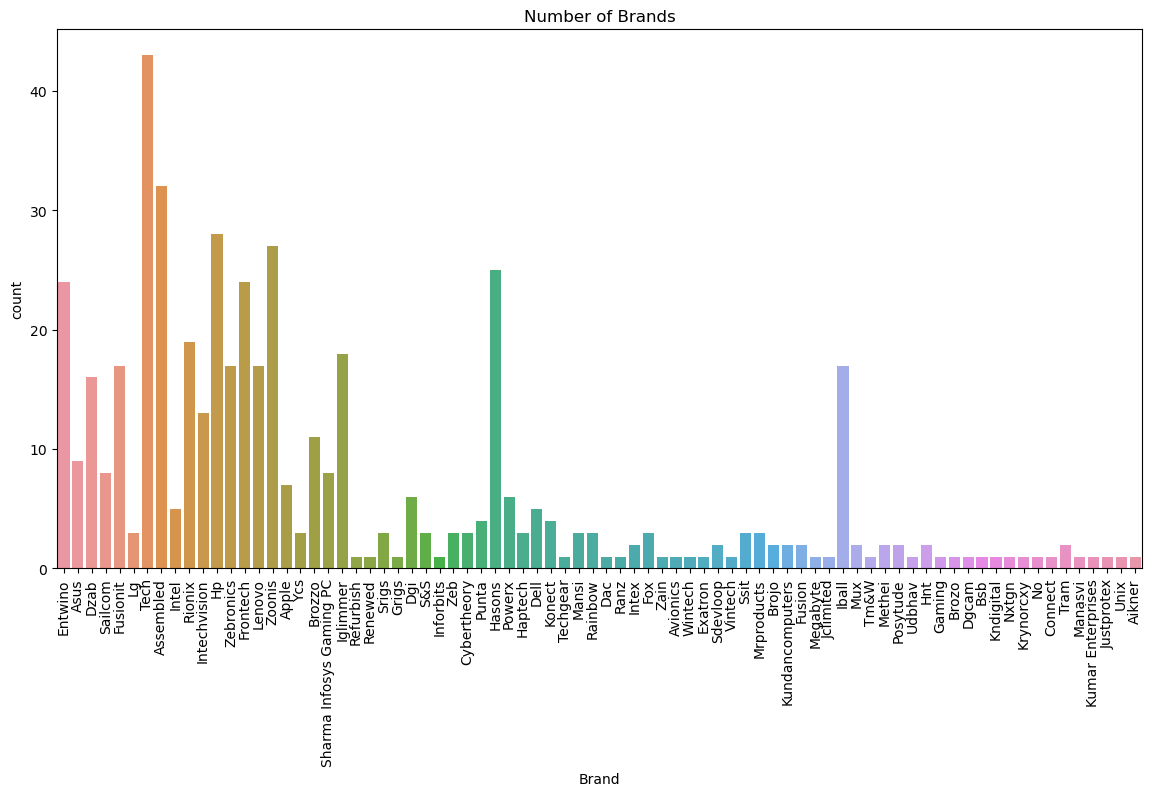

In [267]:
plt.figure(figsize=(14,7))
plt.title('Number of Brands')
plt.xticks(rotation=90)
sns.countplot(data=df2, x='Brand')
plt.show()

In [162]:
df2[df2['Brand']=='Tech']

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
12,Tech,Intel Core I3,Black,4,500,15.1,9554,52
54,Tech,Core I5 Core I5,Multicolor,4,500,15.6,10565,70
56,Tech,Z Core I3,Black,8,500,18.5,11552,66
58,Tech,Tech Core I5,Multicolor,8,500,19.0,12555,74
85,Tech,2000 Core I3,Black,8,1024,20.0,15400,61
95,Tech,Intel Core 2 Duo,Black,4,320,15.1,8499,46
134,Tech,A Tech Asmbelers Series Core I3,Black,8,500,19.0,10999,72
138,Tech,Core I5 Core I5,Multicolor,4,500,15.5,16999,46
147,Tech,Core I5 Core I5,Multicolor,4,500,18.5,10999,71
173,Tech,Intel Core 2 Duo,Multicolor,4,500,15.6,8917,70


In [403]:
a=df2['Brand'].nunique()
a

78

In [404]:
b=df2[df2['Brand']=='Tech']['Brand'].count()
b

43

In [406]:
brand_presence_percentage=(b/a)*100
brand_presence_percentage

55.12820512820513

In [160]:
df2[df2['Brand']=='Tech']['RAM'].value_counts()

RAM
4    24
8    19
Name: count, dtype: int64

In [161]:
df2[df2['Brand']=='Tech']['Storage'].value_counts()

Storage
500     34
1024     5
320      3
512      1
Name: count, dtype: int64

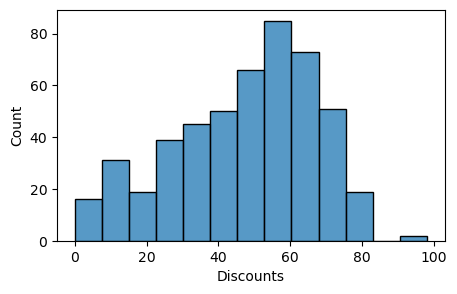

In [265]:
plt.figure(figsize=(5,3))
sns.histplot(data=df2, x='Discounts')
plt.show()

#### Insights -

1. Brand called `Tech` is having higher brand presence by 55% on Flipkart as it is selling more number of Desktops.
2. Tech, Assembled, Hp, Zoonis and Hasons are the Top 5 brands those are selling higher number of Desktops.
3. Other brands named Zebronics, Dzab, Fusionit, Rionix, Intechvision, Sharma Infosys Gaming Pc, Frontech, Lenovo, Entwino, and iball are also having good presence on Flipkart.
4. Analysis on data of `Tech` Brand - 

>Model : They are selling models mostly (70-80%) with the processor of series Core I3 and I5. From customer perspective, processors of Intel Core I3 and I5 is highly desirable. This may be the reason they are targeting to sell core I3 and I5 series more.

>Color : Black is highly marketed and preffered on flipkart. But on some PCs they're providing Multicolor options also. Customers do have color choices, and it seems clearly that they are focusing on providing color options also.

>RAM: `Tech` is selling desktops with only either 4 GB or 8 GB RAM. They're selling 56% 4 GB RAM and rest 44% as 8 GB RAM.

>Storage: `Tech` is providing 80% 500 GB SSD storage more to its customer with other 12% 1 TB, 7% of 320 GB and rest 1% of 512 GB of storage. It seems customers of `Tech` brand preferring 4 GB/8 GB RAM with 500 GB SSD feature more.

>Price: Their price range of various Desktops is 8500-23000 Rs. 

>Discounts: `Tech` is providing more discounts in the range of 40-65% to their customers.

#### Conclusion :

**It seems `Tech` brand is targeting those large group of customers who wants average features with RAM/Storage with desktop cost less than 24000 after giving discounts of majorly 40-65% to their customers, while also offering color options.**

In [53]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Which model is more in demand from the Brand which is selling more number of desktops ?

In [25]:
# As we know that Tech Brand is selling more number of desktops

d=df2[df2['Brand']=='Tech'][['Model']]
d.head()

,Model
12,Intel Core I3
54,Core I5 Core I5
56,Z Core I3
58,Tech Core I5
85,2000 Core I3


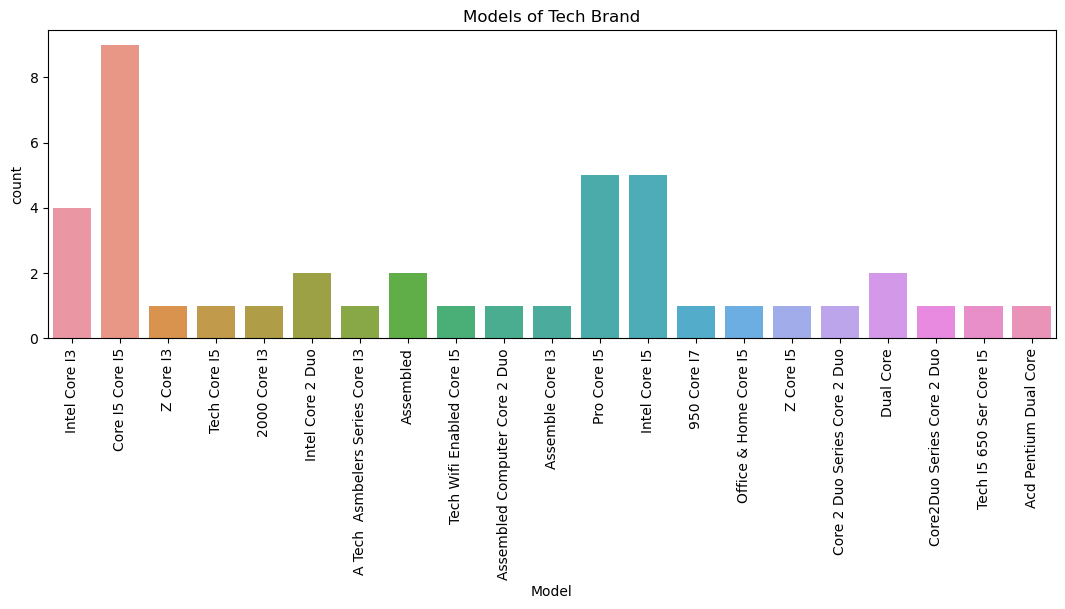

In [26]:
plt.figure(figsize=(13,4))
plt.xticks(rotation=90)
plt.title('Models of Tech Brand')
sns.countplot(data=d, x='Model')
plt.show()

#### Insights :

From the above data, we can see that Core I5 Core I5 model is highest selling category from `Tech` Brand as it is appearing more than 8 times into the data, followed by Intel Core I5 and then Pro Core I5.

### Least Desktops presence on flipkart by which brand ?

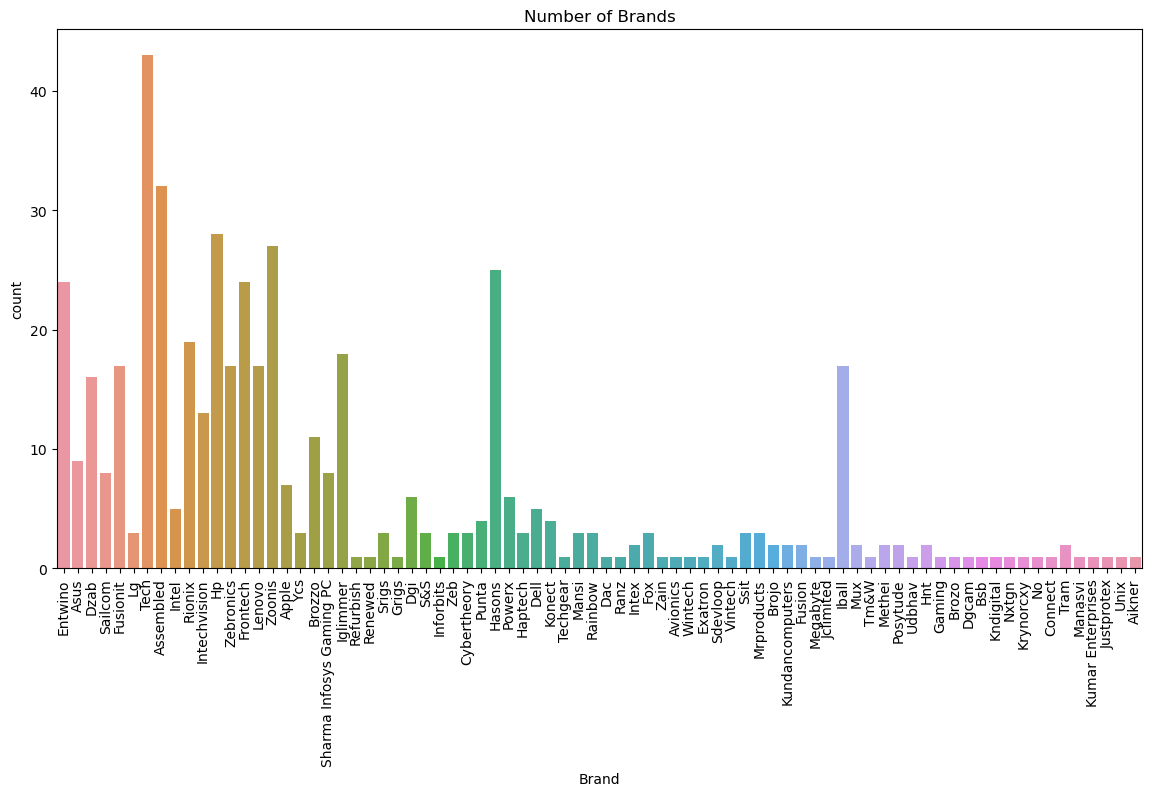

In [264]:
plt.figure(figsize=(14,7))
plt.title('Number of Brands')
plt.xticks(rotation=90)
sns.countplot(data=df2, x='Brand')
plt.show()

In [185]:
least_brand_counts=df2['Brand'].value_counts()

In [196]:
a=least_brand_counts[least_brand_counts==least_brand_counts.min()].index
a

Index(['Nxtgn', 'Kndigital', 'Krynorcxy', 'Bsb', 'Manasvi', 'Connect', 'Unix',
       'Dgcam', 'Brozo', 'Justprotex', 'Kumar Enterprises', 'Gaming', 'No',
       'Dac', 'Udbhav', 'Tm&W', 'Jclimited', 'Megabyte', 'Vintech', 'Exatron',
       'Wintech', 'Avionics', 'Zain', 'Ranz', 'Techgear', 'Inforbits', 'Grigs',
       'Renewed', 'Refurbish', 'Aikner'],
      dtype='object', name='Brand')

In [198]:
d=df2[df2['Brand'].isin(a)]
d

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
50,Refurbish,Pc Dell 7010 Core I5,Black,8,512,18.5,16850,77
61,Renewed,Dell I7 2600 Core I7,Black,8,1024,18.5,17954,60
71,Grigs,Intel Core I5,Black,16,512,18.5,59995,39
84,Inforbits,Dual Core,Black,4,128,18.5,8100,46
132,Techgear,Apu Dual Core,Black,1,512,18.5,18999,70
160,Dac,Ultimate Series Core I9 (10Th Gen),Black,16,1024,21.0,115690,53
165,Ranz,Rz121 Core I3,Black,8,1024,18.5,18999,50
184,Zain,Enterprises Desktop I5 3Rd Generation Core I5,Black,4,500,17.0,17500,58
186,Avionics,Assambled Core I7,Black,8,1024,20.0,15970,27
189,Wintech,Gaming 3470 Core I5,White,8,500,16.0,45990,22


In [203]:
d['Brand'].count()

30

#### Insights :

Their are 30 brands those who're selling Desktops are having very less presence in flipkart. 

**Assumptions :**

1. It can be considerable that they may prefer any other e-commerce sites more as compare to Flipkart.
2. May be due to bad reviews they're facing issues for selling on Flipkart.
3. It can be also possible they're selling more via offline source through their shops itself rather than choosing flipkart.

### Which Processor is more in demand ?

In [205]:
df2[['Model']]

,Model
0,Gaming I7 860
1,Aio A3 Series
2,Intel Core I5
3,Vivo Aio V222 All In One
4,Assemble Core I3
...,...
491,Budget Core 2 Duo
492,G Series Core 2 Duo
493,Hp Aio Pc Core I7
494,Gameing Core I7


In [217]:
i3=[]
i5=[]
i7=[]
other=[]
for i in df2['Model']:
    if 'I3' in i:
        i3.append(i)
    elif 'I5' in i:
        i5.append(i)
    elif 'I7' in i:
        i7.append(i)
    else:
        other.append(i)
print('I3 Processor:',len(i3))
print('I5 Processor:',len(i5))
print('I7 Processor:',len(i7))
print('Other Processors:',len(other))

I3 Processor: 134
I5 Processor: 211
I7 Processor: 65
Other Processors: 86


#### Insights :

From above data we can see that, majority of the brands are preferring to sell the processors of series I5 followed by I3. 

**Assumptions :**

1. Core i3 and i5 are the most preffered by customers for multiple purpose.
2. These series provides wide range of utility like for casual gaming, coding purpose etc.
3. Less expensive compare to other series like i7,i9 etc.
4. Comparision between i3 and i5: 

> I5 processors gives fast performance as compared to I3 series.

> I3 series are less expensive as compared to I5, but many customers these days wants PC which gives fast performance. Hence I5 is more preferred series to be sold by brands.

### Desktop's of which Color is appeared more in the data? 

In [219]:
df1[['Color']].head()

,Color
0,Black
1,White
2,Black
3,White
4,Black


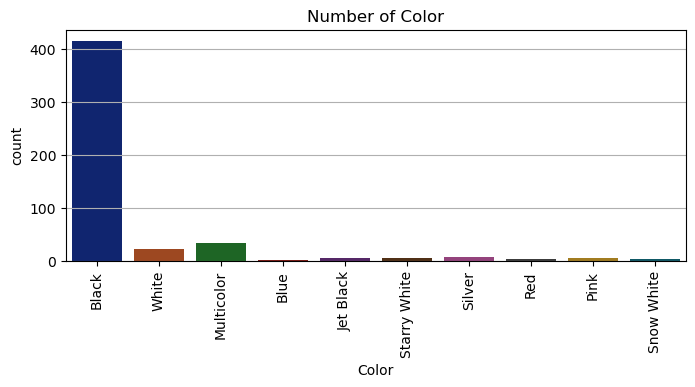

In [279]:
plt.figure(figsize=(8,3))
plt.xticks(rotation=90)
plt.title('Number of Color')
plt.grid()
sns.countplot(data=df2, x='Color',palette='dark')
plt.show()

In [275]:
df2['Color'].value_counts()

Color
Black           415
Multicolor       33
White            21
Silver            7
Starry White      5
Jet Black         4
Pink              4
Red               3
Snow White        3
Blue              1
Name: count, dtype: int64

#### Insights :

1. `Black` is the color which is highly selled by brands and followed with Multicolor then white. 
2. Here Multicolor means brands are giving more options apart from black which includes other colors.
3. We can see from the above graph, `Black` is appearing more than 400 times in our data.

#### Assumptions :

From customer's perspective, `Black` is the highly desirable color as it seems more elegant and professional.

### Highly and least preffered RAM in Desktops ? 

In [297]:
pd.DataFrame(df2['RAM'].value_counts())

,count
RAM,
8,233
4,138
16,114
2,7
1,2
0,1
3,1


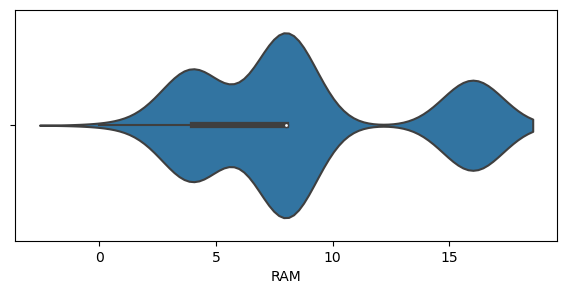

In [303]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df2, x='RAM')
plt.show()

#### Insights :

From the above visual and non-visual analysis of the data, we can see that 8GB RAM is highly selled by brands followed by 4 GB and then 16 GB as their is a large stretch in the graph in the areas of 8 GB, 4 GB and 16 GB. And 1,2,3 GB's are the least preffered. Here 0 GB may be the particular Desktop is having no RAM.

#### Summary :

1. Highly Preffered RAM : 8 GB
2. Second & Third highly preferred RAM: 4 GB & 16 GB
3. Least Preffered RAM : 3 GB, 1 GB, 2GB

In [308]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Top 3 highly and least preffered storage in desktops by brands ?

In [309]:
df2[['Storage']].value_counts()

Storage
500        174
1024       155
512         85
256         30
2048        14
128         10
250          7
320          7
1000         5
750          3
4096         3
120          1
640          1
3072         1
Name: count, dtype: int64

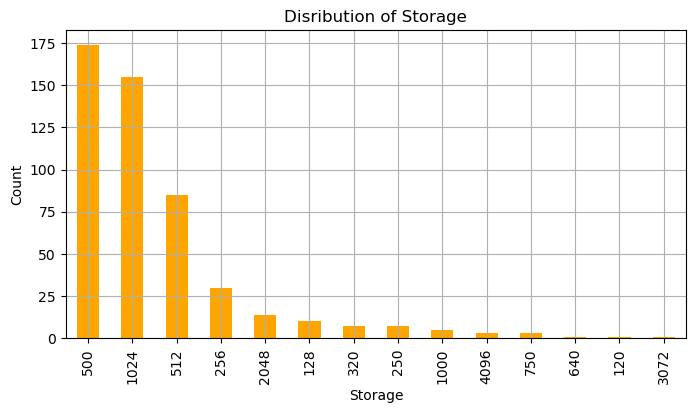

In [348]:
plt.figure(figsize=(8,4))
plt.title('Disribution of Storage')
plt.ylabel('Count')
df2['Storage'].value_counts().plot(kind='bar', color='orange')
plt.grid()
plt.show()

#### Insights :

From above visuals, we can say that 500 GB SSD is the highly preffered to sell on Flipkart and 3072 GB SSD(3TB) is the least preffered to sell by brands. According to the data, 500 GB SSD is having occurance of around 175, 1024 with 155 occurance and 512 with 85 occurances whereas 3072, 640 and 120 occured only once in the data. 

#### Summary :

1. Top 3 highly preffered storage by brands to sell : 500 GB SSD, 1024 GB SSD and then 512 GB SSD
2. Top 3 least preffered storage by brands to sell : 3072 GB SSD, 120 GB SSD, 640 GB SSD

#### Assumption :

1. According to the data, we can say that the storage space of 500 GB SSD, 1024 GB SSD and 512 GB SSD are the enough spaces for doing majority of the work by customers. That is the reason even 3072 GB SSD is larger space but still not occuring as compared to top 3 storage spaces.

2. Also we can say from above data that 256 GB SSD and 2048 GB SSD are having little demand by customers.

In [349]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Average Display(Inch) preferred by brands to sell ? 

In [356]:
df2['Inch'].mean()

19.408870967741933

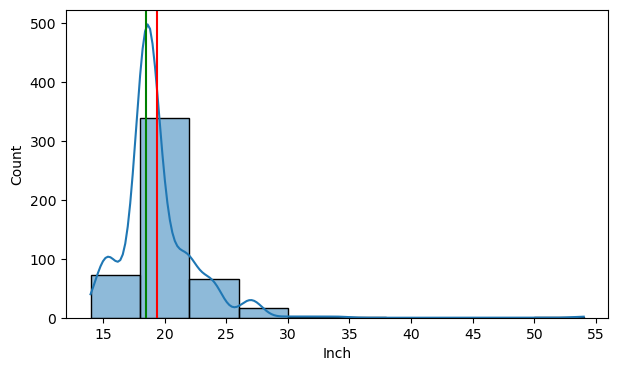

In [368]:
plt.figure(figsize=(7,4))
sns.histplot(data=df2, x='Inch', kde='True', bins=10)
plt.axvline(df2['Inch'].mean(), color='r')
plt.axvline(df2['Inch'].median(), color='g')
plt.show()

#### Insights :

Average display provided by brands in flipkart are nearly around 19.4 inches. From above visual we can say that more number of displays are in the range of 18-22 Inches. Initially first dip is around 16 Inches and then 2nd dip is around 25.1 and at last around 27.5 Inches. After 27.5 Inches their are very less number of displays available by the brands.

#### Summary :

1. Displays in the range of 18-22 Inches are highly selled by brands.
2. Displays in the range of 14.9-17.9 Inches and 22.1-26 Inches are also available as another options.
3. Displays with larger size is available but in very less number

#### Assumptions :

1. According to the data it can be assumed that the customers are preffering average size display for generic purposes, which comes into the size of 18-22 Inch.
2. Larger displays not be needed for multi-purpose works. It can be only helpful to those peoples who are in Tech industry, traders, or professional gamers. Due to this reason it may be not selled much by brands.
3. In some particular cases, customers want displays according to their specific purposes, this may be the strong reason brands are giving other display range option of 14.9-17.9 Inch and 22.1-26 Inches.

### Average Price of Desktops ?

In [370]:
df2[['Price']].head()

,Price
0,16699
1,63990
2,11995
3,30990
4,7994


In [373]:
df2['Price'].mean()

26232.834677419356

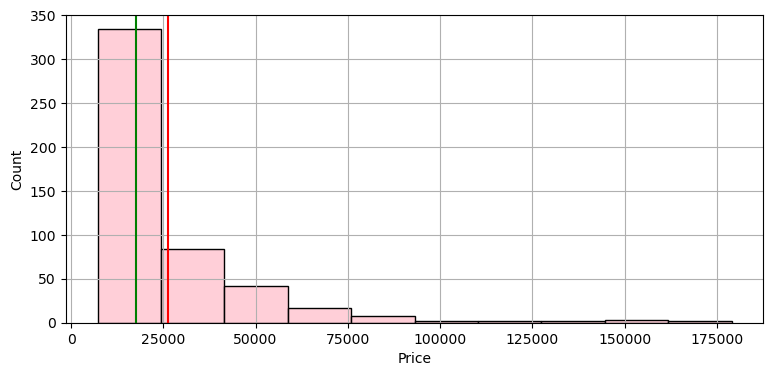

In [383]:
plt.figure(figsize=(9,4))
sns.histplot(data=df2, x='Price',color='pink', bins=10)
plt.axvline(df2['Price'].mean(), color='r')
plt.axvline(df2['Price'].median(), color='g')
plt.grid()
plt.show()

#### Insights :

From above visual it can be said that, average price of the desktops by brands is around 26000 Rs. Price range of 11000-26000 Rs are more preffered by brands to keep for their desktops. Price range starting from 26100-55000 Rs is also the range where people used to buy after the average price of 26000 Rs. Price range starting from 1 Lakh or more are having least presence in flipkart.

#### Assumptions:

1. According to the data, it can be said that brands are targeting the customers those who are preffering budget friendly PCs rather than high priced.
2. It can also be assume that customers may have concern over purchasing Desktops of high value from online channel, this may also a strong reason of non-selling of high priced desktops. From customers perspective, purchasing high value electronics from offline channel is bit secured as compared to online channel.
3. This may also be reason that most of the average people use PCs for generic purposes only, hence not investing much into high priced desktops, rather than that purchasing mid range and budget friendly desktops.

### Top 3 Maximum and Minimum prices of Desktops ?

In [384]:
df2['Price'].value_counts()

Price
10999     12
19999     11
9999       9
14999      8
13999      8
          ..
57199      1
36622      1
18500      1
115690     1
137999     1
Name: count, Length: 348, dtype: int64

#### Insights :

From above data, it can be said that:

**Top 3 Maximum prices**: Brands are preferring to keep these three prices 10999, 19999 amd 9999 Rs as the highest for their desktops.

**Top 3 Minimum prices** : Brands are preferring to keep these prices 137999, 115690, 18500 Rs as the least price for their desktops.

#### Assumptions :

The reason can be, as brands are preferring to target those customers who wants budget friendly PCs. This may be the reason brands are keeping their price range between 9999-19999 Rs.

### Maximum, Minimum and Average discounts given by Brands ?

In [385]:
df2[['Discounts']].head()

,Discounts
0,66
1,23
2,70
3,32
4,66


In [386]:
df2['Discounts'].max()

98

In [387]:
df2['Discounts'].min()

0

In [388]:
df2['Discounts'].mean()

47.266129032258064

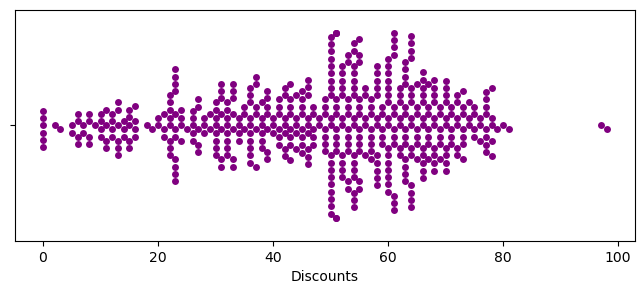

In [400]:
plt.figure(figsize=(8,3))
sns.swarmplot(data=df2, x='Discounts', color='purple')
plt.show()

#### Insights :

From above visual we can say that, brands are giving majority of discounts in the range of 45-62% highly and 22-39% moderately.
Maximum discount given by brands are of 98% but in very very less scenario. Similarly, their are few brands who are giving no discounts but that also in very less scenario. Average discounts provided by brands is 47% nearly.

#### Summary :

1. Average Discounts provided by brands : 47%
2. Discounts range preferred by brands : 45-62% Highly and 22-39% moderately preffered
3. Maximum discounts provided by brands : 98% (In least case)
4. Minimum discounts provided by brands : 0% (In least case)

#### Assumptions :

1. In most of the cases, it is being seen that brands are atleast providing 47% average discounts on their desktops to attract customers.
2. In worst case scenarios, where it might be somewhere few brand's desktop is not sellable due to any reason, so they're giving discounts of 98%. It can also may be if the particular brand is shutting down its business and wants to sell out their products at low cost. This may also be a reason for 98% discount.
3. Sometimes it may happen, seller's Desktop is on high demand and having very good features where discounts may not be justified to give. This may be the reason of not giving discount. 

### How many gaming desktops are being marketed on Flipkart ?

In [32]:
gaming=[]
for i in df2['Model']:
    if 'Gaming' in i:
        gaming.append(i)
    else:
        pass
print('Gaming Desktops :', gaming)
print()
print('Number of Gaming Desktops :', len(gaming))

Gaming Desktops : ['Gaming I7 860', 'Gaming & Editing Desktops Core I7', 'Gaming Pc Intel Core I5', 'Gaming & Editing Desktops Core I3', 'Infosys Gaming Pc Gaming Ryzen 5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming Core I5', 'Gaming & Editing Desktops Core I7', 'Gaming & Editing Desktops Core I5', 'Best Gaming And Editing Dekstop Core I3', 'Gaming & Editing Desktops Core I5', 'Gaming Core I5', 'Gaming & Youtube Editing Core I5 (4Th Gen)', 'Sonet Gaming Desktop Core I5', 'Gaming & Youtube Editing Desktop Core I5', 'Best Gaming And Editing Dekstop Core I3', 'Infosys Gaming Pc Gaming Pc I7 Core I7', 'Gaming & Editing Desktops Core I7  850 Core I7', 'Gaming Core I5', 'Gaming & Editing Desktops Core I5', 'Gaming Core I5', 'G 01 Light Gaming', 'Stealy Gaming & Editing De

#### Insights :

From above data, we can say that out of generic desktops there are 52 gaming desktops in the flipkart marketed by brands.

### Which Brand is selling more number of Gaming Desktops ?

In [34]:
d=df2[['Brand','Model']]

In [189]:
d1=d[d['Model'].str.contains('Gaming')]
d1.head()

,Brand,Model
0,Entwino,Gaming I7 860
13,Assembled,Gaming & Editing Desktops Core I7
23,Frontech,Gaming Pc Intel Core I5
27,Zoonis,Gaming & Editing Desktops Core I3
40,Sharma Infosys Gaming PC,Infosys Gaming Pc Gaming Ryzen 5


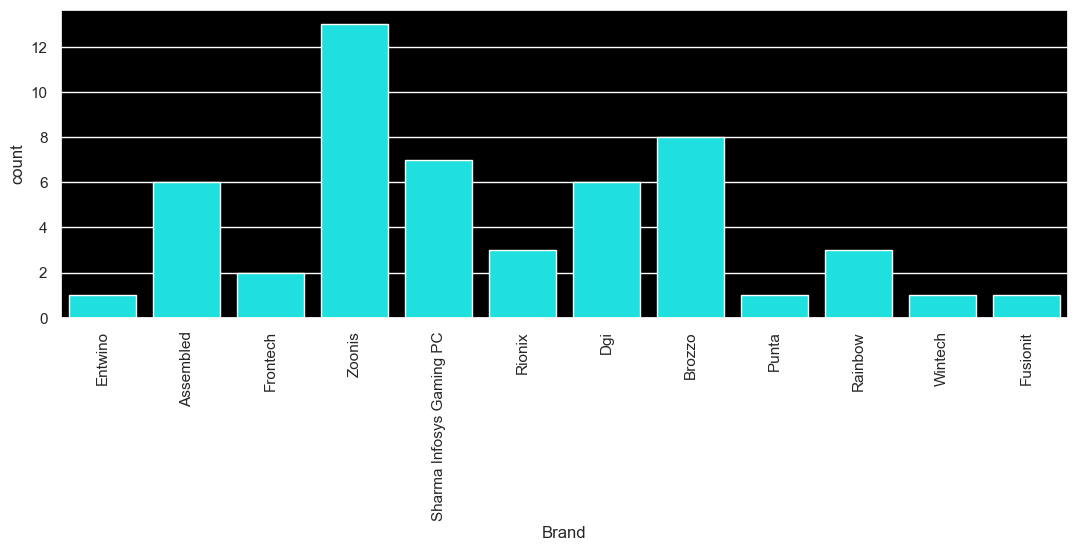

In [84]:
plt.figure(figsize=(13,4))
plt.xticks(rotation=90)
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black"})
sns.countplot(data=d1, x='Brand', color='cyan')
plt.show()

#### Insights :

From above visuals we can infer that, Zoonis is the top brand which is selling more number of Gaming desktops followed by Brozzo and then Sharma Infosys Gaming PCs.

#### Assumption : 

From analysis before, these brands were not into the list of top 5 brands of selling desktops but they are selling higher number of gaming desktops among all brands. It is highly possible that these brands are into selling of Gaming desktops only as it is a niche market to target only those people's who're involved into professional gaming.

# Bivariate Analysis 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Is there any relation between Inch and Prices of Desktops ?

In [151]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


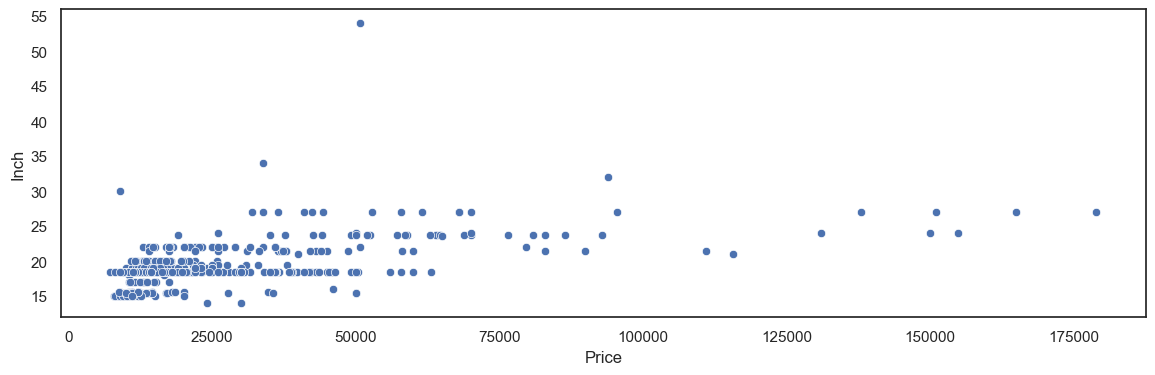

In [149]:
plt.figure(figsize=(14,4))
sns.scatterplot(data=df2, x='Price',y='Inch')
plt.show()

#### Insights :

From above visual we can say that, there is no exact relation between Inch and Price of desktop. Even though Inch is same, still prices are varying from low to high range.


#### Summary :

1. Majority of Inches lying in the range of 15-25.5, where we can see there is majority of desktops are in the range 15-25.5 Inches with 10000-50000 price budget.

2. But even though Inch is 25.5, still it is having desktops with high price range of more than 50000 till 1.76 lakh and even less than 10000 Rs. Also we can see that one desktop is having 55 Inch display with price value of aroung 50000 Rs.

2. From above point we can conclude that, rising in Inches of display has nothing to do with prices. Average inch display also comes with high value price. 

#### Assumption :

It is considerable that even if the display is moderate but desktops are having other good features, then also desktop prices can vary. Hence Price factor is not dependable upon desktop's display only, but other features also play important role.

### RAM and Storage preferences by Brands ?

In [125]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


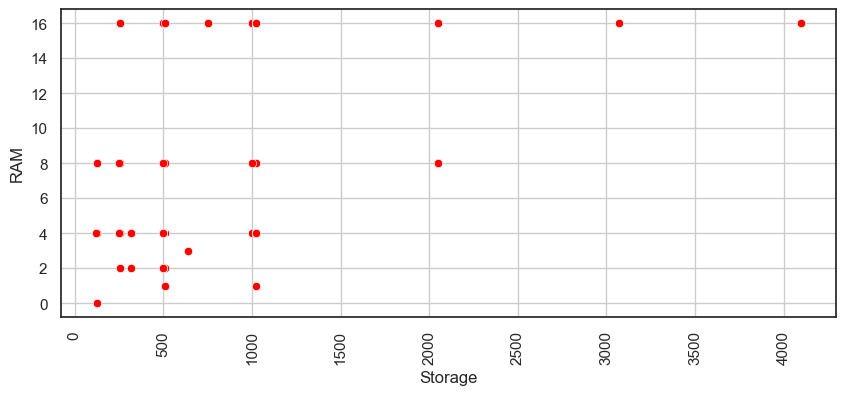

In [166]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.grid()
sns.scatterplot(data=df2, x='Storage', y='RAM',color='Red')
plt.show()

#### Insights :

1. Majority of the brands are preferring the combination of 4/8 GB RAM with storage of 500/512/1024 GB SSD. 
2. 8 GB with 500 GB SSD and 4 GB with 500 GB SSD is highly preffered by brands. With 4/8 GB RAM, 512 GB SSD is also preffered.
3. Trends can be seen in the range of 256 GB SSD to 1024 GB SSD in the case of storage and in RAM it is 4 GB, 8GB & 16 GB.
4. Very few brands are there those are preferring Storage more than 2000 GB SSD.

#### Assumption :

If ABC company wants to scale into desktop domain, they should target those larger group of customers who wants moderate feature in terms of RAM and Storage. ABC company can sell desktops of 8 GB RAM with storage of 500/512 GB SSD or 4 GB RAM with storage of 500/512 GB SSD. These combinations will help them to target more number of customers. Also for providing options, they can keep 16 GB RAM and storage of 1024 GB SSD.

In [167]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Which Brands are giving higher number of discounts ?

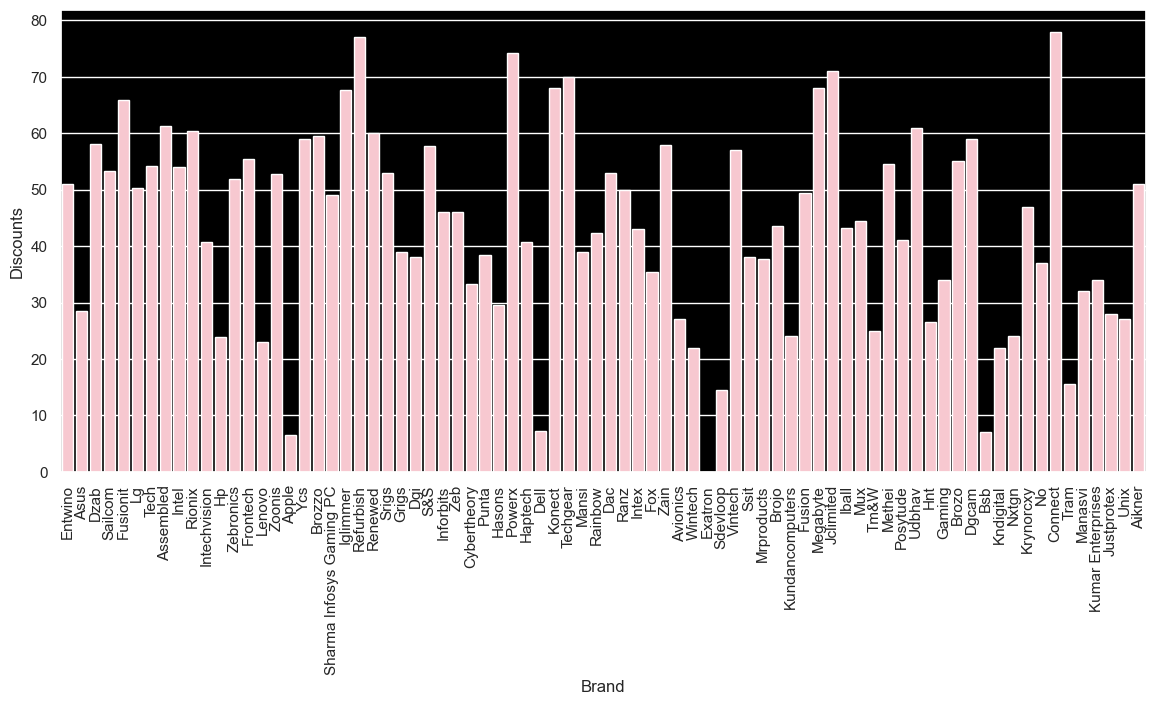

In [183]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black"})
sns.barplot(data=df2, x='Brand', y='Discounts',color='pink',errorbar=None)
plt.show()

#### Insights :

1. From above data, we can say that there are 4 brands those who are giving higher number of discounts. Brand `Connect` is giving highest discounts of approx 79%, followed by `Refurbish` giving 77%, `Powerx` giving 75% and `Jclimited` giving 71%.
2. Majority of the brands are giving discounts in the range of 10-50%.
3. If we study of discounts given by top known brands, then only `Lg` and `Intel` is giving more than 50% discount, rest other known brands like `Apple`, `Asus`, `Lenovo`, `Dell`, `Hp`, these all brands are giving less than 30% discounts. Also there is a high dips in the discount data because of these known brands.

#### Summary :

1. Higher discounts of more than 70% have been recorded by Connect, Refurbish, Powerx and Jclimited.
2. Very less number of brands are providing discounts in the range of 51-70 %.
3. Majority of the brands are providng discounts in the range of 10-50%.
4. Big known brands are providing discounts below 30%.


#### Assumptions :

1. It is possible to say that, the sells are not generating much by these brands, reason they're giving very high discounts.
2. It can also possible that due to festive season, they're giving much higher discounts to attract larger number of customers.
3. As big known brands are having their own brand value, this may be the reason they're not providing much discounts. It is also highly possible that big brands only provide good discounts to those customers who will purchase through their own websites or many other reasons.

In [187]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### After applying discounts, which price range is most commonly observed for desktops?

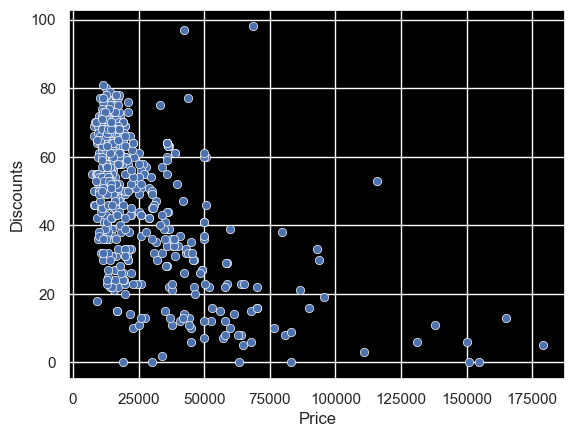

In [190]:
sns.scatterplot(data=df2, x='Price',y='Discounts')
plt.show()

#### Insights :

According to the data, we can conclude that most of the desktop's prices observed into the range of 11000-26000, after applying discounts of 20-80%. Some density also seen in the range of 26000-55000. Even after giving little discounts, high price ranges are very less.

#### Assumptions :

It can be considerable that brands are targeting to sell desktops with the range of 11000-26000 after applying the discounts.
They mostly targeting the average customers who wants budget friendly PCs less than 26000 but also wants discounts from brands.

# Multivariate Analysis 

In [195]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### What are the most favorable features considered by brands, taking into account RAM, storage and color?

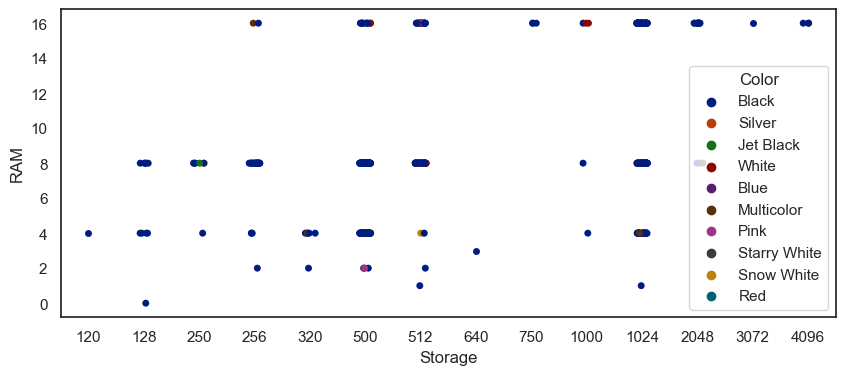

In [208]:
plt.figure(figsize=(10,4))
sns.set_theme(style="white", rc={"axes.facecolor": "white"})
sns.stripplot(data=df2, x='Storage',y='RAM',hue='Color',palette='dark')
plt.show()

#### Insights :

Majority of the brands are preferring black color desktop to sell with 8/4/16 GB RAM and 500/512/1024 GB SSD.

In [244]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


### Preferrable features by top 5 brands

#### From univariate analysis we got to know that, `Tech`, `Assembled`, `Hp`, `Zoonis` and `Hasons` are the Top 5 brands those are selling higher number of Desktops. Lets study their preferrences now altogether.

In [5]:
df2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
0,Entwino,Gaming I7 860,Black,16,1024,18.5,16699,66
1,Asus,Aio A3 Series,White,8,512,23.8,63990,23
2,Dzab,Intel Core I5,Black,8,500,19.0,11995,70
3,Asus,Vivo Aio V222 All In One,White,8,256,21.5,30990,32
4,Dzab,Assemble Core I3,Black,4,500,15.1,7994,66


In [7]:
d2=df2[(df2['Brand']=='Tech') | (df2['Brand']=='Assembled') | (df2['Brand']=='Hp') | (df2['Brand']=='Zoonis') | (df2['Brand']=='Hasons')]

### RAM & Storage preference by top 5 highest selling brands

In [8]:
d2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
12,Tech,Intel Core I3,Black,4,500,15.1,9554,52
13,Assembled,Gaming & Editing Desktops Core I7,Black,16,512,22.0,21899,66
18,Hp,Hp All In One 22 Dd Celeron Dual Core,White,8,500,21.5,36480,22
24,Assembled,2630 Core I5,Black,16,1024,20.0,12699,80
27,Zoonis,Gaming & Editing Desktops Core I3,Black,8,512,22.0,19999,69


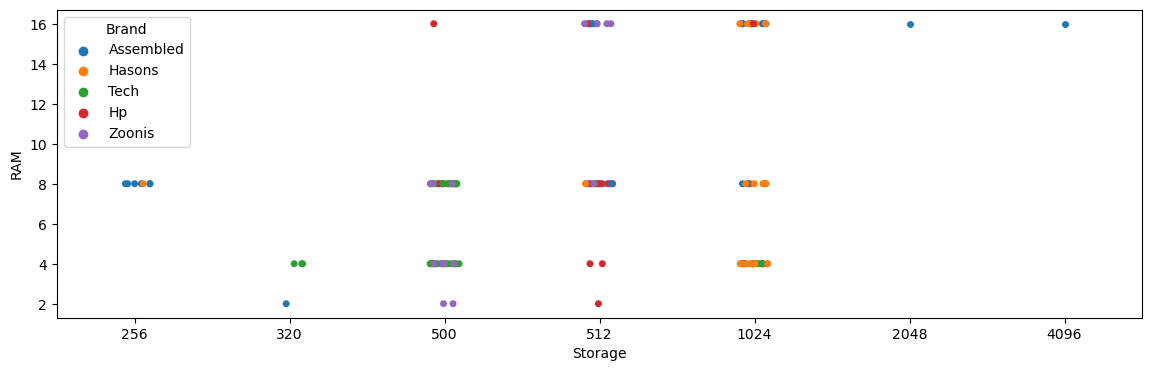

In [15]:
plt.figure(figsize=(14,4))
sns.stripplot(data=d2, x='Storage',y='RAM',hue='Brand')
plt.show()

#### Insights :

From above visual, we can say that top 5 brands are also highly preferring 8 GB RAM with 512 GB SSD storage. For more options, they are preferring to sell 16 GB RAM with 512 GB SSD. Out of 5, 3 brands are also preferred to have 4 GB RAM and 500/1024 GB SSD as more options.

#### Summary :

1. Combination of 8 GB RAM with 512 GB SSD is highly preferred.
2. 4/16 GB RAM and 500/1024 GB SSD is also preferred for giving more options to customers.

In [16]:
d2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
12,Tech,Intel Core I3,Black,4,500,15.1,9554,52
13,Assembled,Gaming & Editing Desktops Core I7,Black,16,512,22.0,21899,66
18,Hp,Hp All In One 22 Dd Celeron Dual Core,White,8,500,21.5,36480,22
24,Assembled,2630 Core I5,Black,16,1024,20.0,12699,80
27,Zoonis,Gaming & Editing Desktops Core I3,Black,8,512,22.0,19999,69


### Price and Color preference by top 5 brands

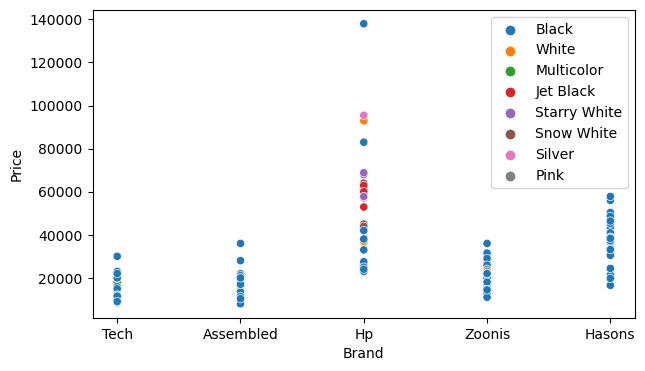

In [41]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=d2, x='Brand',y='Price',hue='Color')
plt.legend(loc='upper right')
plt.show()

#### Insights :

1. `Black` color is most preferred by top 5 brands with price range starting from mostly 10000-40000 Rs. 
2. Out of 5 brand, Hp is the brand which is giving variety of color options and starting range of Hp Desktops is around 21000 to 1 lakh. 
3. There is no relationship between price and colors offered by brands. Even black color desktop which is highly preferred is varying into different price range. It is available below 10000 Rs also and for more than 1 Lakh also.

### Model and Display preferences by brands 

In [42]:
d2.head()

,Brand,Model,Color,RAM,Storage,Inch,Price,Discounts
12,Tech,Intel Core I3,Black,4,500,15.1,9554,52
13,Assembled,Gaming & Editing Desktops Core I7,Black,16,512,22.0,21899,66
18,Hp,Hp All In One 22 Dd Celeron Dual Core,White,8,500,21.5,36480,22
24,Assembled,2630 Core I5,Black,16,1024,20.0,12699,80
27,Zoonis,Gaming & Editing Desktops Core I3,Black,8,512,22.0,19999,69


In [48]:
i3=[]
i5=[]
i7=[]
other=[]
for i in d2['Model']:
    if 'I3' in i:
        i3.append(i)
    elif 'I5' in i:
        i5.append(i)
    elif 'I7' in i:
        i7.append(i)
    else:
        other.append(i)
print('I3 Processor:',len(i3))
print('I5 Processor:',len(i5))
print('I7 Processor:',len(i7))
print('Other Processors:',len(other))

I3 Processor: 34
I5 Processor: 74
I7 Processor: 21
Other Processors: 26


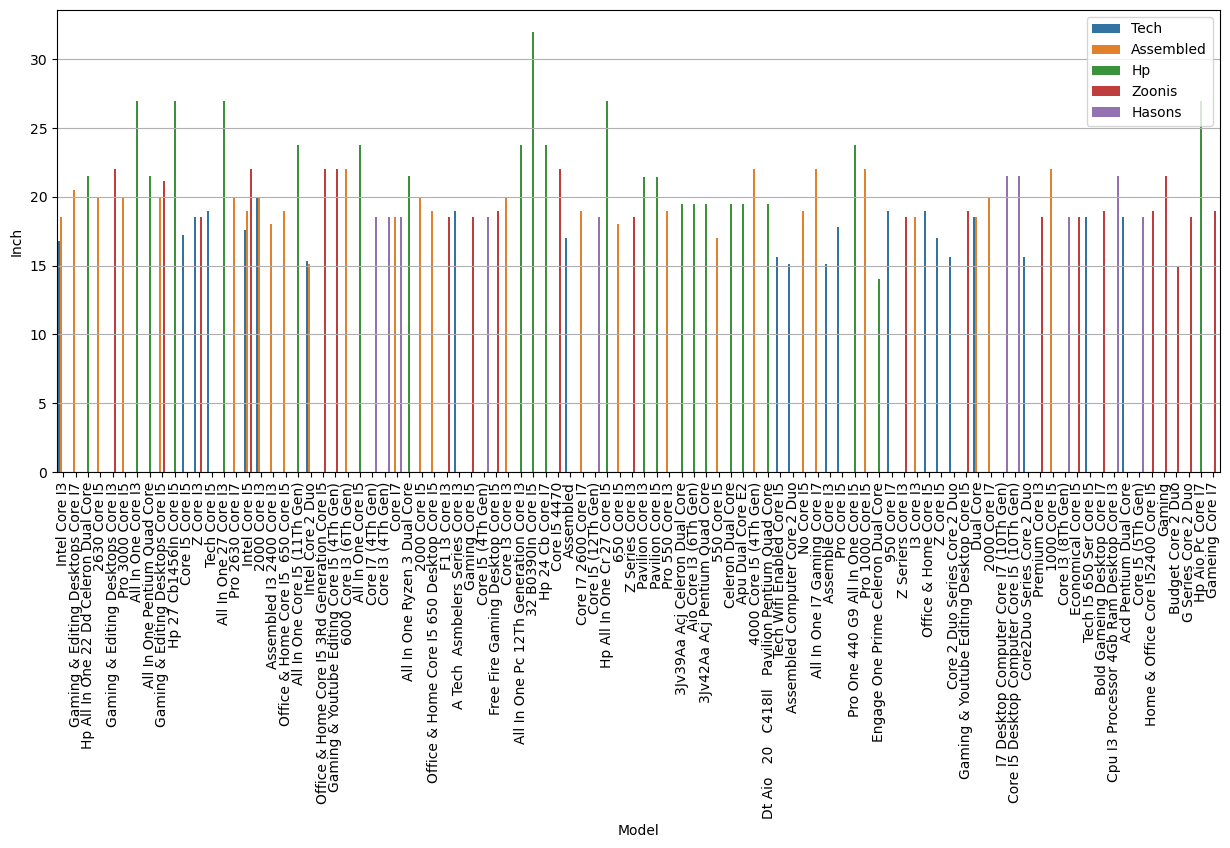

In [52]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.grid()
sns.barplot(data=d2, x='Model',y='Inch',hue='Brand',errorbar=None)
plt.legend(loc='upper right')
plt.show()

#### Insights :

According to the data, we can say that Top 5 brands are preferring to provide minimum 15 Inch display size upto 20 Inches for majority of the model they're selling. Display size range of 20 Inches and above is also available but for very less models. 
In terms of models preferences, I5 processor is the highest favoured by Top 5 brands in the flipkart, followed by I3, then I7 and others.

#### Summary :

1. Minimum 15 Inch display is being provided by top 5 brands, till 20 Inches for most of the models.
2. Above 20 Inches options is also available but not for less models.
3. Top 5 brands are preferring to sell I5 processor series more, followed by I3 and then I7.

# Interpretations :

### Step 1:

**Case Study Selection** : Overall Analysis on Desktops

The objective of this project is to conduct a comprehensive examination of desktop computer brands, their presence, and the features offered on a particular e-commerce platform. The study aims to uncover insights into the preferences of brands regarding desktop features and analyze the selling patterns of desktop computers. Through this research, we seek to gain a deeper understanding of the desktop market dynamics and identify trends in brands choices.

### Step 2:

**Website Selection** : Flipkart


### Step 3:

**Problem Statement** : A newly formed ABC Desktop brand wants to launch their desktops on Flipkart, but before launching they want the complete market understanding of how other brands are performing and based upon that they will make changes with their desktop features and marketing strategies !!

### Step 4:

**Data Collection** : Utilizing the Requests library and BeautifulSoup method, I have extracted data from the Flipkart website. This involved implementing Python code alongside regular expressions (regex) to collect and store the data systematically. The objective is to organize the extracted information in a format conducive to comprehensive data analysis.


### Step 5:

**Creating DataFrame** : In this step, raw dataframe is being created for further analysis.

### Step 6 :

**Exporting and Importing DataFrame** :  The newly created DataFrame is exported in .csv format and subsequently read. This step is crucial, given that our raw data is dynamic and live. Exporting the data to a static format (such as .csv) ensures that it remains unchanged even if the cell is re-run, preserving the integrity of our live data.

### Step 7:

**Making Copy of Original Data** :  Creating a copy of the original data is essential to prevent data loss or unintended changes.

### Step 8: 

**Checking Null values, Information, Columns and Rows of the data**

### Step 9:

**Data Cleaning**  : This step involved the process of removing all null values, invalid values, duplicate rows, changing data types of columns, drop columns (if necessary), removing outliers if necessary and thoroughly cleaning the data for further analysis.

Exported the cleaned data and reloaded it to avoid the need for complete code refresh every time.

### Step 10 :

**Exploratory Data Analysis** :

Revised the problem statement for improved clarity and understanding, and formulated various questions to guide univariate, bivariate, and multivariate analysis.

**1. Univariate Analysis** :

Conducting in-depth research on desktop brands and features through various plots to gain comprehensive insights into each individual column. Also provied various insights, summary and assumptions.

**2. Bivariate Analysis** :

Examining the relationships and interactions between different pairs of variables within the desktop dataset through various plots. Also provied various insights, summary and assumptions.

**3. Multivariate Analysis** :

Exploring complex relationships among multiple variables in the desktop dataset through visualizations, providing a holistic understanding of the interplay between various features. Also provied various insights, summary and assumptions.

# Conclusion :

## Insights from Univariate Analysis

#### From Brands Perspective : 

1. `Tech` Brand is selling higher number of desktops in flipkart with the brand presence of 55% compared to other brands.
2. `Tech`, `Assembled`, `Hp`, `Zoonis` and `Hasons` are the Top 5 brands those are selling higher number of Desktops.
3. There are 30 brands those who're selling Desktops are having very less presence in flipkart. 
4. Out of generic desktops there are 52 gaming desktops in the flipkart marketed by brands.
5. Zoonis is the top brand which is selling more number of Gaming desktops followed by Brozzo and then Sharma Infosys Gaming PCs.

#### From Model's Perspective :

1. Series I5 is the highest selling category in models, followed by I3 (second highest) then I7 and other models.
2. Core I5 Core I5 model is highest selling category from `Tech` Brand as it is appearing more than 8 times into the data, followed by Intel Core I5 and then Pro Core I5.

#### From Color's Perspective :

**`Black`** color is the most preffered color in desktops, with the presence of 84% as compared to other colors. **`Black`** color is appearing 415 times in the whole data.

#### From RAM's Perspective :

8 GB RAM is the highly selled by brands followed by 4 GB and 16 GB. With least selled of 1 GB, 2 GB and 3 GB.

#### From Storage Perspective :

500 GB SSD, 1024 GB SSD AND 512 GB SSD is the highly preferable storage to be selled by brands, with least preffered of 3072 GB SSD, 120 GB SSD and 640 GB SSD.

#### From Inch's Perspective :

Displays in the range of 18-22 Inches are highly selled by brands. Display in the range of 30-54 Inch is the least marketed by brands.

#### From Price Perspective :

1. Average price of the desktops by brands is around 26000 Rs. 
2. Price range of 11000-26000 Rs are more preffered by brands to keep for their desktops. 
3. Price range starting from 26100-55000 Rs is also the range where people used to buy after the average price of 26000 Rs. 
4. Price range starting from 75000 or more are having least presence in flipkart.

#### From Discounts Perspective :

1. Brands are giving majority of discounts in the range of 45-62% highly and 22-39% moderately.
2. Maximum discount given by brands are of 98% but in very very less scenario. Similarly, their are few brands who are giving no discounts but that also in very less scenario. 
3. Average discounts provided by brands is 47% nearly.

## Analysis on Top seller in Flipkart :

### Data of `Tech` Brand - 

>Model : They are selling models mostly (70-80%) with the processor of series Core I3 and I5. From customer perspective, processors of Intel Core I3 and I5 is highly desirable. This may be the reason they are targeting to sell core I3 and I5 series more. Core I5 Core I5 model is highest selling category from `Tech` Brand as it is appearing more than 8 times into the data, followed by Intel Core I5 and then Pro Core I5.

>Color : Black is highly marketed and preffered on flipkart. But on some PCs they're providing Multicolor options also. Customers do have color choices, and it seems clearly that they are focusing on providing color options also.

>RAM: `Tech` is selling desktops with only either 4 GB or 8 GB RAM. They're selling 56% 4 GB RAM and rest 44% as 8 GB RAM.

>Storage: `Tech` is providing 80% 500 GB SSD storage more to its customer with other 12% 1 TB, 7% of 320 GB and rest 1% of 512 GB of storage. It seems customers of `Tech` brand preferring 4 GB/8 GB RAM with 500 GB SSD feature more.

>Price: Their price range of various Desktops is 8500-23000 Rs. 

>Discounts: `Tech` is providing more discounts in the range of 40-65% to their customers.

#### Conclusion :

**It seems `Tech` brand is targeting those large group of customers who wants average features with RAM/Storage with desktop cost less than 24000 after giving discounts of majorly 40-65% to their customers, while also offering color options.**

## Insights from Bivariate Analysis :


#### Relationship between Inch and Price :

There is no exact relation between Inch and Price of desktop. Even though Inch is same, still prices are varying from low to high range. Rising in Inches of display has nothing to do with prices. Average inch display also comes with high value price. 

#### Relationship between RAM and Storage :

1. Majority of the brands are preferring the combination of 4/8 GB RAM with storage of 500/512/1024 GB SSD. 
2. 8 GB with 500 GB SSD and 4 GB with 500 GB SSD is highly preffered by brands. With 4/8 GB RAM, 512 GB SSD is also preffered.
3. Overall trends can be seen in the range of 256 to 1024 GB SSD in the case of storage and in RAM it is 4 GB, 8GB & 16 GB.


#### Relationship between Brands and Discounts :

1. Higher discounts of more than 70% have been recorded by Connect, Refurbish, Powerx and Jclimited.
2. Very less number of brands are providing discounts in the range of 51-70 %.
3. Majority of the brands are providng discounts in the range of 10-50%.
4. Big known brands are providing discounts below 30%.

#### Relationship between Price and Discounts :

Most of the desktop's prices observed is into the range of 11000-26000, after applying discounts of 20-80%. Some density also seen in the range of 26000-55000.

## Insights from Multivariate Analysis :

#### Relationship between Color, RAM, and Storage :

Majority of the brands are preferring black color desktop to sell with 8/4 GB RAM and 500/512 GB SSD.

###  Analysis on Top 5 brands -

#### RAM & Storage preference by top 5 highest selling brands :

1. Combination of 8 GB RAM with 512 GB SSD is highly preferred.
2. 4/16 GB RAM and 500/1024 GB SSD is also preferred for giving more options to customers.

#### Price and Color preference by top 5 brands :

1. `Black` color is most preferred by top 5 brands with price range starting from mostly 10000-40000 Rs. 
2. Out of 5 brand, Hp is the brand which is giving variety of color options and starting range of Hp Desktops is around 21000 to 1 lakh. 
3. There is no relationship between price and colors offered by brands. Even black color desktop which is highly preferred is varying into different price range. It is available below 10000 Rs also and for more than 1 Lakh also.

#### Model and Display preferences by brands 

1. Minimum 15 Inch display is being provided by top 5 brands, till 20 Inches for most of the models.
2. Above 20 Inches options is also available but not for less models.
3. Top 5 brands are preferring to sell I5 processor series more, followed by I3 and then I7.

# Suggestions :

#### Suggestions to ABC Company for launching their Desktop brand on Flipkart :

**1. In Terms of Model Launch :**

For ABC Company to excel with their models, they should consider predominantly selling desktop models with the I5 series. It would be advisable to allocate at least 45% to I5 series, with an additional provision of 30% for I3 and 25% for I7 models as optional choices. These percentages are justified if we look the data of highest seller `Tech` brand other Top 4 brands, those are selling higher number of desktops. Analyzing the trends, both the top 5 brands and other brands combined demonstrate a preference for selling I5 series models. Segmenting the percentages according to the data can be beneficial for ABC Company in the long run.

According to the data, 52 gaming desktops are being marketed over flipkart by brands. And their are few brands those are mostly selling gaming desktops. Hence ABC Company can explore the gaming desktops market, but it's recommended to introduce them during the second phase. This approach allows the company to first observe and understand the performance of the initially launched desktops before venturing into a different segment. 

**2. In Terms of Color :**

According to the data, it is highly advisable for ABC Company to initially launch only black-colored desktops. Black is the most preferred color across all brands, with an 84% presence compared to other colors. Introducing multicolor options in the initial phase may increase production costs, and it's better to start with the highly favored color before considering a range of colors.

**3. In Terms of RAM and Storage :**

ABC Company should prioritize selling desktops with 8/4 GB RAM and 512/500 GB SSD configurations. However, it would be highly commendable to offer a variety of options to cater to different customer preferences. The data indicates that combinations of 8/4/16 GB RAM with 512/500/1024 GB SSD dominate the market. It is strongly advised that ABC Company avoids launching configurations exceeding 16 GB RAM and 1024 GB SSD storage, as well as those with less than 4 GB RAM and 500 GB SSD storage. Multiple analyses justify that the majority of brands have limited sales in these categories.

**4. In Terms of Display Size (Inches) :**

ABC Company should focus on selling desktops with a display size ranging from 15 to 22 inches. The data indicates a preference among the top 5 brands and other brands for display sizes within this range. It is advisable for ABC Company to avoid offering display sizes larger than 22 inches, as the data justifies that desktops with sizes exceeding 22 or 23 inches are less preferred by brands. Additionally, there is no observed relation between display size (Inches) and the price of desktops. Therefore, ABC Company should not be concerned about the relationship between inches and prices.

**5. In Terms of Price :**

It is highly advisable for ABC Company to set the price range for their desktops between 10,000 and 26,000 Rs after applying discounts. This range allows them to target budget-conscious customers. While offering higher-priced options up to 50,000 Rs for better choices, they should focus on catering to the general middle-class population. The data indicates that all brands, including the top 5, provide desktops in the price range of 11,000 to 26,000 Rs after discounts, with the top 5 brands extending their options to 50,000 Rs

**6. In Terms of Discount :**

ABC Company may consider offering average discounts in the range of 30-47%, aligning with the industry trend where most brands provide discounts between 10-50%, averaging at 47%. Introducing launch discounts can attract a larger customer base, fostering new relationships and increasing brand awareness, particularly among the middle-class population.